# Analyse exploratoire d'un jeu de données de la banque mondiale dans le cadre du projet d'expansion à l'international de la société de formation en ligne EdTech

In [199]:
# chargement des modules nécessaires à la manipulation et à la visualisation des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [200]:
# chargement des fichiers de la banque mondiale
Country = pd.read_csv("C://Users//hp//Documents//openclassrooms//projet2//EdStatsCountry.csv")
Series = pd.read_csv("C://Users//hp//Documents//openclassrooms//projet2//EdStatsSeries.csv")
CountrySeries = pd.read_csv("C://Users//hp//Documents//openclassrooms//projet2//EdStatsCountry-Series.csv")
FootNote = pd.read_csv("C://Users//hp//Documents//openclassrooms//projet2//EdStatsFootNote.csv")
Data = pd.read_csv("C://Users//hp//Documents//openclassrooms//projet2//EdStatsData.csv")

# Présentation du jeu de données

## Description des fichiers

### 1) fichier Country

In [201]:
# donne la liste des colonnes, le nombre de valeurs non nulles et le type de données
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [202]:
# affiche les 2 premières lignes
Country.head(2)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


#### Inspection des région et des income groups

In [203]:
#vérifie si le nombre de lignes du fichier est égale au nombre de valeurs uniques de la colonne 'Country Code'
print(len(Country['Country Code'].unique()))
print (len(Country))
print('\n')

# donne le nombre de pays associés à chaque région et à chaque income group
print(Country['Region'].value_counts(dropna=False))
print('\n')
print(Country['Income Group'].value_counts(dropna=False))


241
241


Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
NaN                           27
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64


Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
NaN                     27
Name: Income Group, dtype: int64


#### création d'une liste de pays valides et nouveau mapping des régions

Le fichier Country est une liste de pays et de leurs caractéristiques dont des regroupements par niveau de richesse et zones géographiques. Certains pays ne sont pas catégorisés. Un nouveau fichier est créé sous excel pour compléter les données manquantes et modifier les zones géographiques pour que les zones soient de tailles comparables  

In [204]:
#chargement du fichier avec les pays valides créé sous Excel
Pays = pd.read_csv("C://Users//hp//Documents//openclassrooms//projet2//Pays3.csv", delimiter=";")

Pays=Pays.set_index('Country Code')

RegionDict=Pays.iloc[:,0].to_dict()   # un dictionnaire pour mapper les pays avec les nouvelles régions
PaysValides=Pays.index.to_list()
Pays['Region'].value_counts()

Europe                      47
America                     45
Sub-Sah Africa              43
S-E Asia & Ocea             42
Mid E & N Afr & Ce. Asia    40
Name: Region, dtype: int64

### 2) fichier Séries

In [205]:
# donne la liste des colonnes, le nombre de valeurs non nulles et le type de données
Series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [206]:
# affiche les 2 premières lignes
Series.head(2)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
#vérifie si le nombre de lignes du fichier est égale au nombre de valeurs uniques de la colonne 'Series Code'
print(len(Series['Series Code'].unique()))
print (len(Series))

3665
3665


Le fichier Series est une liste d'indicateurs avec leurs caractéristiques. Il ne contient aucun doublon et 6 colonnes vides

### 3) fichier CountrySeries

In [208]:
# donne la liste des colonnes, le nombre de valeurs non nulles et le type de données
CountrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [209]:
# affiche les 2 premières lignes
CountrySeries.head(2)


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [210]:
# vérifie si le nombre de lignes du fichier est égale au nombre de valeurs uniques de la clef constituée par les colonnes
# CountryCode et SeriesCode
clef = CountrySeries['CountryCode']+CountrySeries['SeriesCode']
print(len(clef.unique()))
print (len(CountrySeries))

613
613


Le fichier CountrySeries est une liste de descriptions apportées à certains couples (Pays,Indicateurs) Il ne contient aucun doublon et une colonne vide

### 4) fichier Data

In [211]:
# donne la liste des colonnes, le nombre de valeurs non nulles et le type de données
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [212]:
# supprime la colonne vide et affiche les 2 premières lignes
Data=Data.drop(['Unnamed: 69'], axis=1)
Data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le fichier Data est le fichier principal du jeu de données. Il donne pour chaque couple (Indicateur, Pays) une liste de valeurs par année de 1970 à 2100. Il ne contient pas de doublon mais beaucoup de valeurs manquantes et une colonne vide

In [213]:
# vérifie si le nombre de lignes du fichier est égale au nombre de valeurs uniques de la clef constituée par les colonnes
# Country Code et Indicator Code
clef = Data['Country Code']+Data['Indicator Code']
print(len(clef.unique()))
print (len(Data))

886930
886930


#### Ajout de colonnes Region, Income Group et Topic. Sélection des pays valides uniquement  

In [214]:
Data['Region']=np.nan
Data.loc[:,'Region']=Data['Country Code'].map(RegionDict) #mapping des pays avec les nouvelles régions
Data=Data.merge(Country[['Country Code','Income Group']], how='left', on='Country Code')
Data=Data.iloc[np.isin(Data['Country Code'],PaysValides)] # sélection des pays valides uniquement

Data=Data.merge(Series[['Series Code','Topic']], how='left', left_on='Indicator Code', right_on='Series Code')
Data=Data.drop('Series Code', axis=1) # supprime la colonne en souble
Data['Topic']=Data['Topic'].fillna('Non renseigné') # donne un nom aux NaN
Data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Region,Income Group,Topic
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mid E & N Afr & Ce. Asia,Low income,Secondary


In [215]:
test=Data[['Country Name','Region','Income Group']].drop_duplicates()
test['Region'].value_counts()
test['Income Group'].value_counts()

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

#### Retraitement des income groups

In [216]:
DictIncome={'Upper middle income': 'Up mid inc','Lower middle income': 'Lo mid inc',\
'High income: nonOECD' :'Hi inc nOCDE','Low income':'Lo inc','High income: OECD':'Hi inc OCDE','?':'Hi inc nOCDE'}
# le nom des différentes catégories est raccourci pour éviter le chevauchement sur les graphiques.

# Les 3 pays sans catégorie sont ajoutés à la catégorie Hi inc nOCDE
Data['Income Group']=Data['Income Group'].fillna('?')
Data['Income Group']=Data['Income Group'].map(DictIncome)
Data['Income Group'].value_counts(dropna=False)

Up mid inc      201575
Lo mid inc      183250
Hi inc nOCDE    172255
Lo inc          124610
Hi inc OCDE     113615
Name: Income Group, dtype: int64

In [217]:
Data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Region,Income Group,Topic
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mid E & N Afr & Ce. Asia,Lo inc,Secondary


### 5) Fichier FootNote

In [218]:
# donne la liste des colonnes, le nombre de valeurs non nulles et le type de données
FootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [219]:
# affiche les 2 premières lignes
FootNote.head(2)


,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [220]:
# vérifie si le nombre de lignes du fichier est égale au nombre de valeurs uniques de la clef constituée par les colonnes
# CountryCode, SeriesCode et Year
clef = FootNote['CountryCode']+FootNote['SeriesCode']+FootNote['Year']
print(len(clef.unique()))
print (len(FootNote))

643638
643638


Le fichier FootNote donne, pour chaque clef (Indicateur, Pays, Annee) une précision sur le chiffre donné. Il ne contient pas de doublon mais une colonne vide

## Remplissage des données

### Création d'une copie du fichier Data

In [221]:
# pour obtenir le dataframe Data avec des 1 à la place des valeurs existantes et des 0 à la place des NaN
DataTest= Data.iloc[:,:72].groupby(['Country Name', 'Country Code','Indicator Name','Indicator Code','Region','Income Group','Topic']).count().reset_index()
DataTest.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Topic,1970,1971,1972,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,Mid E & N Afr & Ce. Asia,Lo inc,Secondary,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
NbIndicateurs=len(DataTest['Indicator Code'].unique()) #garde en mémoire le nombre d'indicateurs 
NbPays=len(DataTest['Country Code'].unique()) # et le nombre de pays
DataTest.head(1)


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Topic,1970,1971,1972,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,Mid E & N Afr & Ce. Asia,Lo inc,Secondary,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Taux de remplissage par année par région/income group

#### Taux de remplissage par année par région

Text(0, 0.5, 'Taux de remplissage (%)')

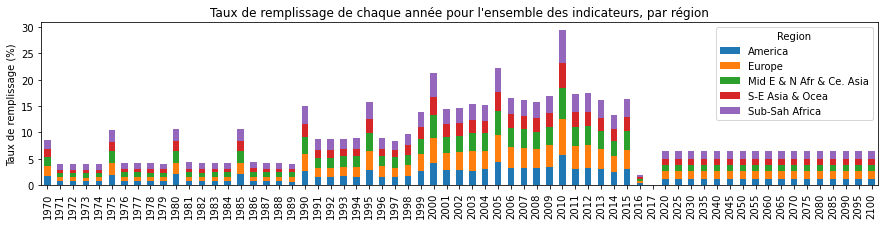

In [223]:
(DataTest.groupby('Region').sum().T/NbIndicateurs/NbPays*100).plot(kind='bar', stacked=True, figsize=[15,3])
plt.title('Taux de remplissage de chaque année pour l\'ensemble des indicateurs, par région')
plt.ylabel('Taux de remplissage (%)')

#### Taux de remplissage par année par income group

Text(0, 0.5, 'Taux de remplissage (%)')

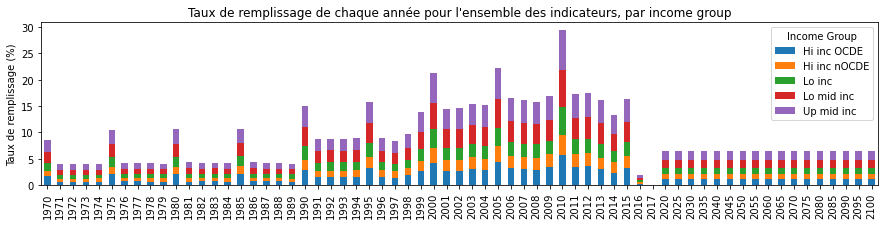

In [224]:
(DataTest.groupby('Income Group').sum().T/NbIndicateurs/NbPays*100).plot(kind='bar', stacked=True, figsize=[15,3])
plt.title('Taux de remplissage de chaque année pour l\'ensemble des indicateurs, par income group')
plt.ylabel('Taux de remplissage (%)')

In [225]:
DataTest.groupby('Topic').sum().to_excel('C://Users//hp//Documents//openclassrooms//projet2//rempTopics.xls')

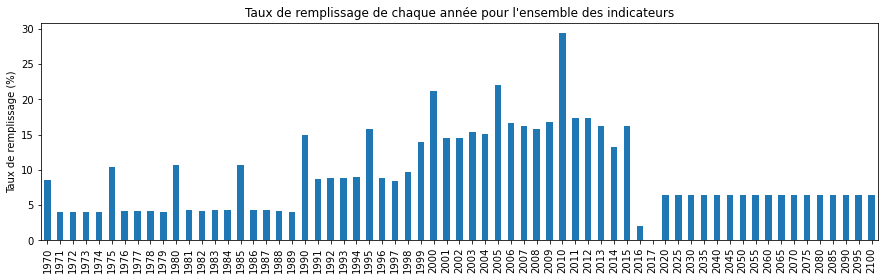

In [226]:
(DataTest.iloc[:,7:].sum(axis=0)/NbIndicateurs/NbPays*100).plot(kind='bar', figsize=[15,4])
plt.title('Taux de remplissage de chaque année pour l\'ensemble des indicateurs')
plt.ylabel('Taux de remplissage (%)')
plt.savefig('rempli.jpeg')

In [227]:
(DataTest.iloc[:,7:].sum(axis=0)/NbIndicateurs/NbPays*100).describe()

count    65.000000
mean      9.274128
std       5.701530
min       0.017981
25%       4.314571
50%       6.428729
75%      14.484380
max      29.371122
dtype: float64

#### Distribution du taux de remplissage des différentes années

Text(0.5, 1.0, 'Distribution du remplissage des années')

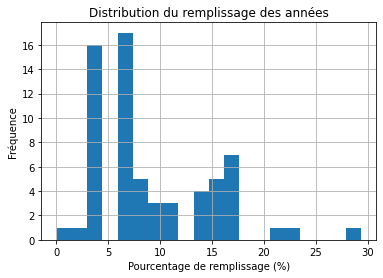

In [228]:
(DataTest.iloc[:,7:].mean()*100).hist(bins=20)
plt.xlabel('Pourcentage de remplissage (%)')
plt.ylabel('Fréquence')
plt.title('Distribution du remplissage des années')

#### Nouvelle copie du fichier Data pour les graphs de remplissage sans disctinction d'année

In [229]:
DataTest2=DataTest.copy()
ColonnesAnnees=DataTest2.columns[7:]
DataTest2['TRemplissage']= DataTest2[ColonnesAnnees].mean(axis=1) #donne la moyenne de remplissage pour l'ensemble des années
DataTest2.drop(ColonnesAnnees, axis=1, inplace=True) #supprime les colonnes années
DataTest2.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Topic,TRemplissage
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,Mid E & N Afr & Ce. Asia,Lo inc,Secondary,0.076923


In [230]:
DataTest3 =(DataTest2.groupby(['Country Name','Region','Income Group']).mean()*100).reset_index()
#DataTest3.to_excel('C://Users//hp//Documents//openclassrooms//projet2//datatest3.xls')

### Taux de remplissage des indicateurs par pays par région/income group

#### Boxplots 

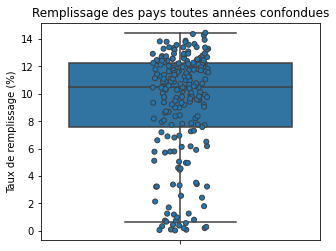

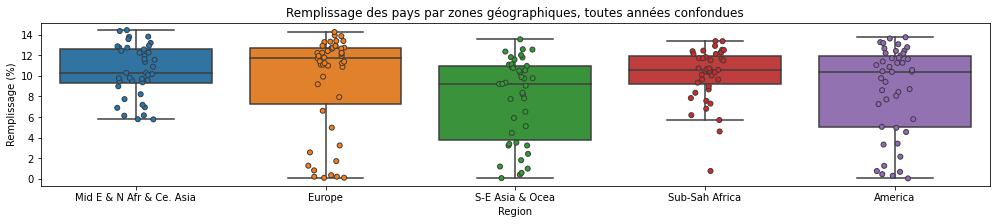

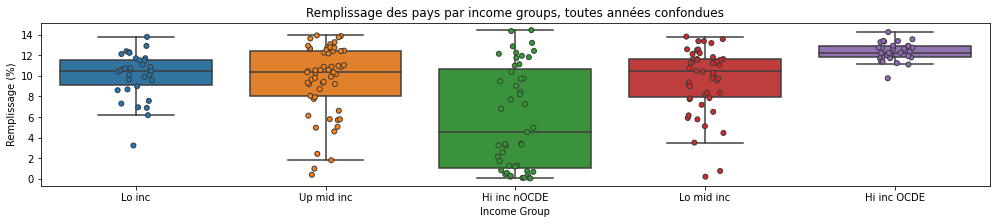

In [231]:
plt.figure(figsize=[5,4]) 

plt.title("Remplissage des pays toutes années confondues")
sns.stripplot(y='TRemplissage', linewidth=1,data=DataTest3)
sns.boxplot(y='TRemplissage', fliersize=0,data=DataTest3)
plt.ylabel('Taux de remplissage (%)')
plt.show()
plt.figure(figsize=[17,3])

plt.title("Remplissage des pays par zones géographiques, toutes années confondues")
sns.stripplot(x='Region', y='TRemplissage', linewidth=1,data=DataTest3)
sns.boxplot(x='Region', y='TRemplissage', fliersize=0,data=DataTest3)
plt.ylabel('Remplissage (%)')
plt.show()

plt.figure(figsize=[17,3])

plt.title("Remplissage des pays par income groups, toutes années confondues")
sns.stripplot(x='Income Group', y='TRemplissage', linewidth=1,data=DataTest3)
sns.boxplot(x='Income Group', y='TRemplissage', fliersize=0,data=DataTest3)
plt.ylabel('Remplissage (%)')
plt.show()


#### Histogramme 

Text(0.5, 1.05, 'Distribution du taux de remplissage par pays')

<Figure size 1224x216 with 0 Axes>

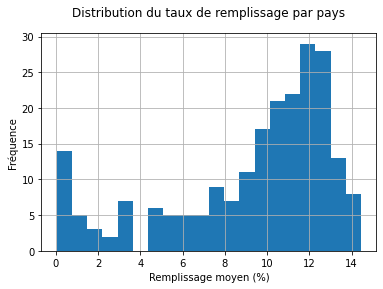

In [232]:
plt.figure(figsize=[17,3])
DataTest3[['TRemplissage']].hist(bins=20)
plt.xlabel('Remplissage moyen (%)')
plt.ylabel('Fréquence')
plt.title('Distribution du taux de remplissage par pays', y=1.05)

In [233]:
DataTest3[['TRemplissage']].describe()

,TRemplissage
count,217.000000
mean,9.274128
std,3.904303
min,0.036940
25%,7.574352
50%,10.498059
75%,12.222479
max,14.449365


### Taux de remplissage des pays par indicateur par topic

In [234]:
DataTest4 =(DataTest2.groupby(['Indicator Code','Topic']).mean()*100).reset_index()
DataTest4.head(1)

,Indicator Code,Topic,TRemplissage
0,BAR.NOED.1519.FE.ZS,Attainment,9.188231


#### Boxplot

Text(0.5, 1.0, 'Remplissage des indicateurs par topic, toutes années confondues')

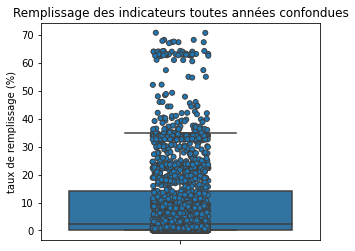

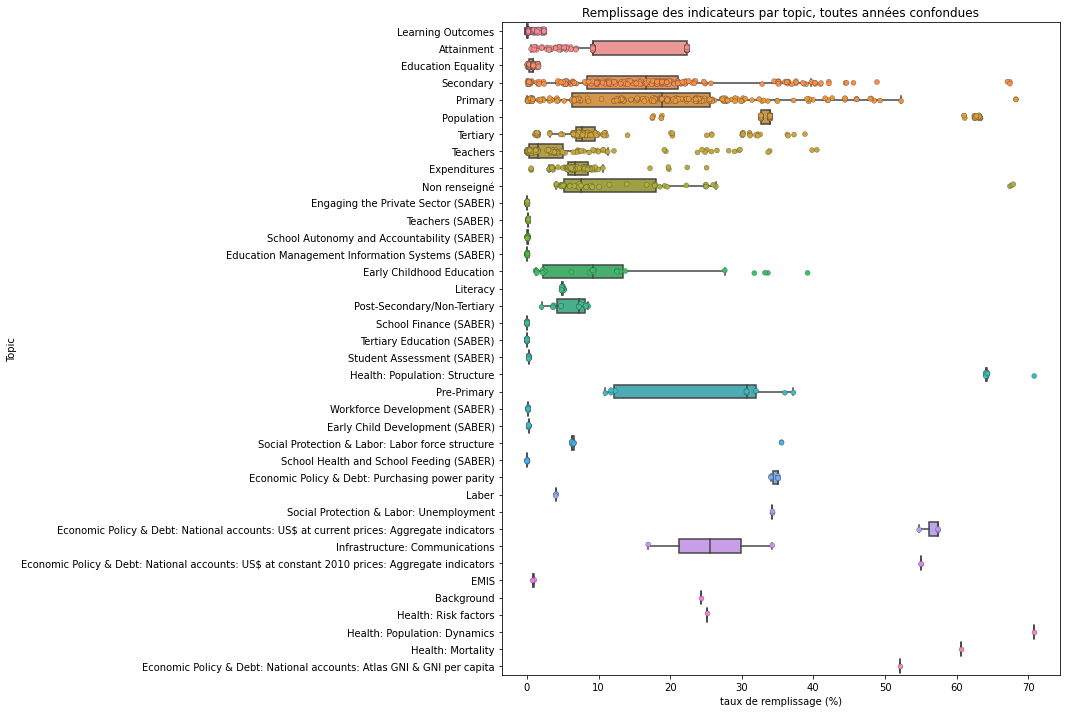

In [235]:
plt.figure(figsize=[5,4])
sns.boxplot(y='TRemplissage',data=DataTest4, fliersize=0)
sns.stripplot(y='TRemplissage',data=DataTest4, linewidth=1)
plt.ylabel('taux de remplissage (%)')
plt.title('Remplissage des indicateurs toutes années confondues')

ClassTopics= DataTest4.groupby('Topic').count().sort_values('Indicator Code', ascending=False).index.to_list()

plt.figure(figsize=[10,12])
sns.boxplot(x='TRemplissage', y='Topic',data=DataTest4, fliersize=0, orient='h', order=ClassTopics)
sns.stripplot(x='TRemplissage',y='Topic',data=DataTest4, linewidth=0.3, orient='h', order=ClassTopics)
plt.xlabel('taux de remplissage (%)')
plt.title('Remplissage des indicateurs par topic, toutes années confondues')

#### Countplot avec la liste d'indicateurs et le nombre d'éléments

Text(0.5, 0, "Nombre d'indicateurs (échelle logarithmique)")

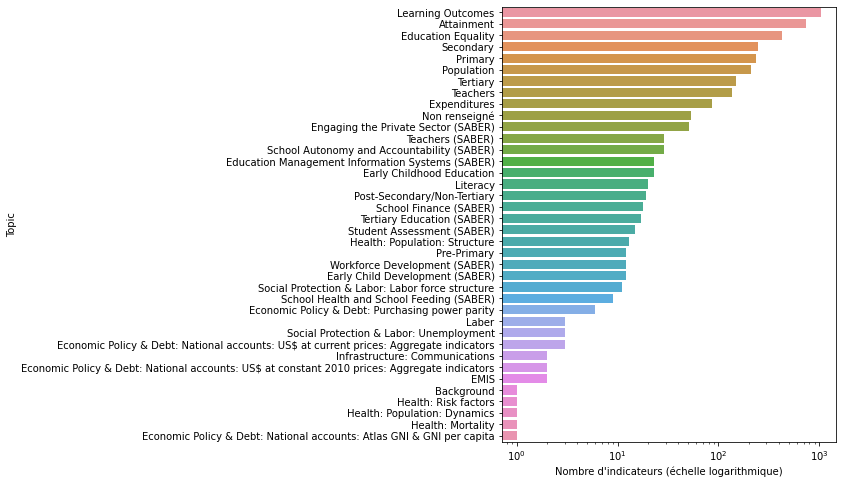

In [236]:
plt.figure(figsize=[6,8])
grid=sns.countplot(y='Topic', data=DataTest4, orient='h', order=ClassTopics)
grid.set(xscale="log") #car l'ordre de grandeur est très différent entre le 1er et le dernier
plt.xlabel("Nombre d'indicateurs (échelle logarithmique)")

#### Création d'une colonne Topic2 avec le regroupement de différents Topic pour plus de lisibilité

In [237]:
DataTest5=DataTest.copy()
others= ['Education Equality','Infrastructure: Communications', 'Learning Outcomes',
'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
'Economic Policy & Debt: Purchasing power parity','Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
'Teachers', 'Education Management Information Systems (SABER)','Early Child Development (SABER)',
'Engaging the Private Sector (SABER)','School Health and School Feeding (SABER)',
'School Autonomy and Accountability (SABER)','School Finance (SABER)', 'Student Assessment (SABER)','Teachers (SABER)', 
'Tertiary Education (SABER)','Workforce Development (SABER)', 'Literacy', 'Background', 'Early Childhood Education', 
'Pre-Primary', 'Non renseigné', 'Expenditures','Health: Risk factors', 'Health: Mortality',
'Social Protection & Labor: Labor force structure', 'Laber','Social Protection & Labor: Unemployment',
'Health: Population: Structure','Health: Population: Dynamics', 'EMIS','Post-Secondary/Non-Tertiary']
DataTest5['Groupe de Topics']=DataTest5['Topic']
DataTest5.loc[np.isin(DataTest5['Topic'],others),'Groupe de Topics']='Others'
DataTest5.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Topic,1970,1971,1972,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Groupe de Topics
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,Mid E & N Afr & Ce. Asia,Lo inc,Secondary,0,0,0,...,0,0,0,0,0,0,0,0,0,Secondary


Text(0, 0.5, 'Taux de remplissage (%)')

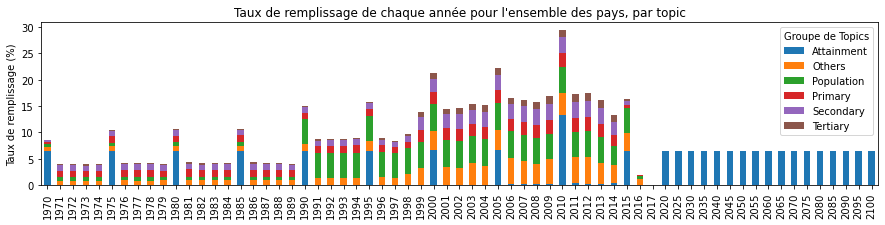

In [238]:
(DataTest5.groupby('Groupe de Topics').sum().T/NbIndicateurs/NbPays*100).plot(kind='bar', stacked=True, figsize=[15,3])
plt.title('Taux de remplissage de chaque année pour l\'ensemble des pays, par topic')
plt.ylabel('Taux de remplissage (%)')

#### Histogramme avec taux de remplissage par indicateur

Text(0.5, 1.05, 'Distribution du taux de remplissage par pays')

<Figure size 1224x216 with 0 Axes>

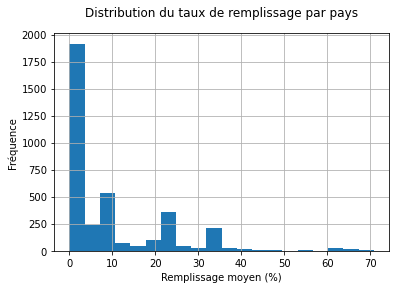

In [239]:
plt.figure(figsize=[17,3])
DataTest4[['TRemplissage']].hist(bins=20)
plt.xlabel('Remplissage moyen (%)')
plt.ylabel('Fréquence')
plt.title('Distribution du taux de remplissage par pays', y=1.05)

In [240]:
DataTest4[['TRemplissage']].describe()

,TRemplissage
count,3665.000000
mean,9.274128
std,12.823700
min,0.007090
25%,0.205601
50%,2.261609
75%,14.058844
max,70.818859


## Selection des indicateurs

In [241]:
Data.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Region,Income Group,Topic
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mid E & N Afr & Ce. Asia,Lo inc,Secondary


* Les 11 indicateurs jugés les plus pertinents sont conservés parmis les 3665 disponibles. Il sont répartis en 4 catégories pour faciliter l'analyse : économie, démographie, éducation et infrastructure. Je conserve aussi 2 indicateurs de projection future

In [242]:
IndicSelec=['IT.CMP.PCMP.P2','IT.NET.USER.P2','NY.GDP.PCAP.CD', 
'SE.SEC.ENRR','SE.SEC.ENRL.TC.ZS','SE.TER.ENRR',
'SE.XPD.TOTL.GB.ZS','SP.POP.TOTL','SP.SEC.TOTL.IN','SP.TER.TOTL.IN','UIS.DR.2.GPV.T']

Projections=['PRJ.POP.1519.2.MF','PRJ.POP.2024.3.MF']
                     
DataFiltre = Data.loc[np.isin(Data['Indicator Code'],IndicSelec)]
DataFiltre.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2070,2075,2080,2085,2090,2095,2100,Region,Income Group,Topic
517,Afghanistan,AFG,Cumulative drop-out rate to the last grade of ...,UIS.DR.2.GPV.T,NaN,NaN,NaN,25.304609,31.01144,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mid E & N Afr & Ce. Asia,Lo inc,Secondary


#### Indicateurs retenus avec leur définition

In [243]:
Series[np.isin(Series['Series Code'], IndicSelec)][['Series Code','Indicator Name','Long definition']]#.to_excel('C://Users//hp//Documents//openclassrooms//projet2//IndSelec.xls')

,Series Code,Indicator Name,Long definition
610,IT.CMP.PCMP.P2,Personal computers (per 100 people),Personal computers are self-contained computer...
611,IT.NET.USER.P2,Internet users (per 100 people),Internet users are individuals who have used t...
1662,NY.GDP.PCAP.CD,GDP per capita (current US$),GDP per capita is gross domestic product divid...
2302,SE.SEC.ENRL.TC.ZS,Pupil-teacher ratio in secondary education (he...,Average number of pupils per teacher at a give...
2307,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)","Total enrollment in secondary education, regar..."
2335,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",Total enrollment in tertiary education (ISCED ...
2380,SE.XPD.TOTL.GB.ZS,Expenditure on education as % of total governm...,"Total general (local, regional and central) go..."
2590,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...
2608,SP.SEC.TOTL.IN,Population of the official age for secondary e...,Population of the age-group theoretically corr...
2614,SP.TER.TOTL.IN,Population of the official age for tertiary ed...,Population of the age-group theoretically corr...


### Modification d'indicateurs

In [244]:
DataFiltreBis=DataFiltre.copy()
DataFiltreMelt=pd.melt(DataFiltreBis, id_vars=['Country Code','Indicator Code','Country Name', 'Indicator Name','Region','Income Group','Topic'], var_name='Annee')
DataPays=DataFiltreMelt.loc[:,['Country Code','Country Name','Region','Income Group']].drop_duplicates() # listes des pays avec leurs caractéristiques
DataIndic=DataFiltreMelt.loc[:,['Indicator Code','Indicator Name','Topic']].drop_duplicates() # liste des indicateurs avec leurs caractéristiques

In [245]:
DataPays.head(1)

,Country Code,Country Name,Region,Income Group
0,AFG,Afghanistan,Mid E & N Afr & Ce. Asia,Lo inc


In [246]:
DataIndic.head(1)

,Indicator Code,Indicator Name,Topic
0,UIS.DR.2.GPV.T,Cumulative drop-out rate to the last grade of ...,Secondary


#### 4 indicateurs combinés pour n'en former plus que 2 (fusion du secondaire et du tertiaire)

In [247]:
DataFiltrePivot=pd.pivot_table(DataFiltreMelt, columns=['Indicator Code'], index=['Country Code', 'Annee'], values='value')
DataFiltrePivot['SP.TOTL.IN']=DataFiltrePivot['SP.SEC.TOTL.IN']+DataFiltrePivot['SP.TER.TOTL.IN']
DataFiltrePivot['SE.ENRR']=((DataFiltrePivot['SE.SEC.ENRR']/100*DataFiltrePivot['SP.SEC.TOTL.IN'])+\
(DataFiltrePivot['SE.TER.ENRR']/100*DataFiltrePivot['SP.TER.TOTL.IN']))/(DataFiltrePivot['SP.TOTL.IN'])
IndicsSupprimes=['SP.TER.TOTL.IN','SP.SEC.TOTL.IN','SE.SEC.ENRR','SE.TER.ENRR']
DataFiltrePivot2=DataFiltrePivot.loc[:,np.isin(DataFiltrePivot.columns, IndicsSupprimes, invert=True)]
DataFiltrePivot2.reset_index(inplace=True)
DataFiltrePivot2.head(1)

Indicator Code,Country Code,Annee,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.SEC.ENRL.TC.ZS,SE.XPD.TOTL.GB.ZS,SP.POP.TOTL,UIS.DR.2.GPV.T,SP.TOTL.IN,SE.ENRR
0,ABW,1970,NaN,NaN,NaN,NaN,NaN,59063.0,NaN,13088.0,NaN


In [248]:
DataFiltreMelt2 = pd.melt(DataFiltrePivot2, id_vars=['Country Code', 'Annee'])
DataFiltreMelt2.head(1)

,Country Code,Annee,Indicator Code,value
0,ABW,1970,IT.CMP.PCMP.P2,NaN


#### Réintégration des nouveaux indicateurs dans le fichier d'origine

In [249]:
DataFinal= DataFiltreMelt2.copy()
DataFinal = DataFinal.merge(DataPays, how='left', on='Country Code')
DataFinal=DataFinal.merge(DataIndic, how='left',on='Indicator Code')
DataFinal.head(1)

,Country Code,Annee,Indicator Code,value,Country Name,Region,Income Group,Indicator Name,Topic
0,ABW,1970,IT.CMP.PCMP.P2,NaN,Aruba,America,Hi inc nOCDE,Personal computers (per 100 people),Infrastructure: Communications


#### Donne un nom aux nouveaux indicateurs crées

In [250]:
DictNouveauxIndics={'SE.ENRR':'Gross Enrolment ratio, secondary and tertiary %','SP.TOTL.IN': "Population en âge d'être dans le secondaire ou le tertiaire"}
DataFinal.loc[:,'Indicator Name2']=np.nan
DataFinal.loc[:,'Indicator Name2']=DataFinal['Indicator Code'].map(DictNouveauxIndics)
DataFinal.loc[:,'Indicator Name']= DataFinal['Indicator Name'].fillna(DataFinal['Indicator Name2'])
DataFinal= DataFinal.drop('Indicator Name2', axis=1)

#### Création des 4 catégories d'indicateurs (Démographie, Education, Infrastructures, Economie)

In [251]:
Dem =['BAR.PRM.CMPT.1519.ZS','SP.SEC.TOTL.IN','SP.TER.TOTL.IN','SP.POP.TOTL','SP.SECTER.TOTL.IN','PRJ.POP', 'SP.TOTL.IN']
Edu =['SE.SEC.ENRL.TC.ZS','SE.SEC.ENRR.LO','SE.SEC.ENRR.UP','UIS.DR.2.GPV.T','UIS.NERT.2','SE.SEC.ENRR',\
'SE.TER.ENRR','UIS.NERT.2','SE.SECTER.ENRR','SE.ENRR'] 
Inf =['IT.CMP.PCMP.P2','IT.NET.USER.P2']
Eco =['NY.GDP.PCAP.CD', 'SE.XPD.TOTL.GB.ZS']

DataFinal.loc[np.isin(DataFinal['Indicator Code'],Inf),'CategorieIndicateur']='Inf'
DataFinal.loc[np.isin(DataFinal['Indicator Code'],Edu),'CategorieIndicateur']='Edu'
DataFinal.loc[np.isin(DataFinal['Indicator Code'],Eco),'CategorieIndicateur']='Eco'
DataFinal.loc[np.isin(DataFinal['Indicator Code'],Dem),'CategorieIndicateur']='Dem'
DataFinal.head(1)

,Country Code,Annee,Indicator Code,value,Country Name,Region,Income Group,Indicator Name,Topic,CategorieIndicateur
0,ABW,1970,IT.CMP.PCMP.P2,NaN,Aruba,America,Hi inc nOCDE,Personal computers (per 100 people),Infrastructure: Communications,Inf


## Sélection de la période

### Sélection des années et filtrage du dataframe

Les données du 20e siècle sont trop anciennes pour être utiles à la prise de décision. Elles seront retirées. 2000, 2005, 2010 puis toutes les années jusqu'en 2015 inclus seront conservées. Les projections futures ne seront pas prises en compte

In [252]:
AnneesConservees =['2000', '2005', '2010', '2011', '2012', '2013', '2014', '2015']
DataFinal=DataFinal.loc[np.isin(DataFinal['Annee'],AnneesConservees)]
DataFinal.head(1)

,Country Code,Annee,Indicator Code,value,Country Name,Region,Income Group,Indicator Name,Topic,CategorieIndicateur
30,ABW,2000,IT.CMP.PCMP.P2,NaN,Aruba,America,Hi inc nOCDE,Personal computers (per 100 people),Infrastructure: Communications,Inf


#### Ajout d'une colonne qui indique si la valeur est un NaN ou non

In [253]:
DataDis=DataFinal.copy()
DataFinal2=DataFinal.copy()
#DataFinal2['rempli']=DataFinal2['value'].apply(lambda x : 0 if np.isnan(x) else 1)
#DataFinal2[DataFinal2['Indicator Code']=='SE.ENRR'].head()

#### Création d'une colonne moyenne qui donne la valeur moyenne des années 2000-2005-2010-2011-2012-2013-2014-2015

In [254]:
DataFinalMoy=pd.pivot_table(DataFinal2, index=['Country Code','Indicator Code','Country Name','Region','Income Group','Indicator Name', 'CategorieIndicateur'], columns='Annee', values=['value']).reset_index()
DataFinalMoy.columns

MultiIndex([(       'Country Code',     ''),
            (     'Indicator Code',     ''),
            (       'Country Name',     ''),
            (             'Region',     ''),
            (       'Income Group',     ''),
            (     'Indicator Name',     ''),
            ('CategorieIndicateur',     ''),
            (              'value', '2000'),
            (              'value', '2005'),
            (              'value', '2010'),
            (              'value', '2011'),
            (              'value', '2012'),
            (              'value', '2013'),
            (              'value', '2014'),
            (              'value', '2015')],
           names=[None, 'Annee'])

In [255]:
DataFinalMoy['moyenne']=DataFinalMoy.iloc[:,7:15].mean(axis=1)
DataFinalMoy=DataFinalMoy.droplevel([1], axis=1)
DataFinalMoy=DataFinalMoy.drop('value', axis=1)
DataFinalMoy=DataFinalMoy.rename({'moyenne':'value'}, axis=1)
DataFinalMoy['Annee']='moyenne'
DataFinalMoy=DataFinalMoy[['Country Code','Annee','Indicator Code','value','Country Name','Region','Income Group','Indicator Name','CategorieIndicateur']]
DataFinalMoy.head(1)

,Country Code,Annee,Indicator Code,value,Country Name,Region,Income Group,Indicator Name,CategorieIndicateur
0,ABW,moyenne,IT.CMP.PCMP.P2,7.923544,Aruba,America,Hi inc nOCDE,Personal computers (per 100 people),Inf


### Nombre de pays ayant au moins une année remplie à l'intérieur de la période sélectionnée

In [256]:
DataFinalMoy.groupby('Indicator Code')[['value']].count()

,value
Indicator Code,
IT.CMP.PCMP.P2,188
IT.NET.USER.P2,204
NY.GDP.PCAP.CD,208
SE.ENRR,169
SE.SEC.ENRL.TC.ZS,179
SE.XPD.TOTL.GB.ZS,166
SP.POP.TOTL,215
SP.TOTL.IN,197
UIS.DR.2.GPV.T,161


### Nombre de pays ayant au moins une valeur renseignée par indicateur sur l’ensemble des années sélectionnées

In [257]:
Nb_Final_Pays =DataFinalMoy.groupby(['Country Code'])[['value']].count().sort_values('value', ascending=False).reset_index()
Nb_Final_Pays[Nb_Final_Pays['value']==9].count()

Country Code    115
value           115
dtype: int64

In [258]:
DataFull=DataFinalMoy.append(DataFinal.drop('Topic',axis=1))
DataFull.columns

Index(['Country Code', 'Annee', 'Indicator Code', 'value', 'Country Name',
       'Region', 'Income Group', 'Indicator Name', 'CategorieIndicateur'],
      dtype='object')

#### Nombre de pays ayant des données renseignées pour chaque couple Indicateur/Annee

In [259]:
DataDis2=DataFinal2.groupby(['Annee','Indicator Code'])[['value']].count().unstack()
DataDis2.T

Annee                    2000  2005  2010  2011  2012  2013  2014  2015
      Indicator Code                                                   
value IT.CMP.PCMP.P2      162   171     0     0     0     0     0     0
      IT.NET.USER.P2      196   198   202   204   202   201   201   201
      NY.GDP.PCAP.CD      199   204   203   203   199   200   197   196
      SE.ENRR             100   115   113   119   113   108    99    82
      SE.SEC.ENRL.TC.ZS   113   108    95   108    99    99   109    93
      SE.XPD.TOTL.GB.ZS   114   109   124   118   111   115    88    40
      SP.POP.TOTL         215   215   215   215   214   214   210   210
      SP.TOTL.IN          190   193   190   173   167   161   194   129
      UIS.DR.2.GPV.T       76    95   109   109   105    93     6     0

#### Nombre d'indicateurs remplis par pays par année

In [260]:
IndicRemp = DataFull.groupby(['Annee', 'Country Code'])[['value']].count()
IndicRemp=IndicRemp.unstack()
IndicRemp=IndicRemp.droplevel(0, axis=1)
IndicRemp['total']=IndicRemp.mean(axis=1)
IndicRemp

Country Code,ABW,AFG,AGO,ALB,AND,ARE,ARG,ARM,ASM,ATG,...,VIR,VNM,VUT,WSM,XKX,YEM,ZAF,ZMB,ZWE,total
Annee,,,,,,,,,,,,,,,,,,,,,
2000,8.0,2.0,7.0,9.0,3.0,6.0,9.0,6.0,1.0,5.0,...,2.0,6.0,8.0,9.0,2.0,6.0,6.0,7.0,6.0,6.290323
2005,8.0,5.0,6.0,7.0,4.0,6.0,9.0,8.0,2.0,5.0,...,4.0,5.0,6.0,6.0,2.0,6.0,7.0,6.0,5.0,6.488479
2010,7.0,5.0,5.0,7.0,4.0,4.0,7.0,4.0,2.0,6.0,...,3.0,6.0,4.0,6.0,2.0,5.0,5.0,5.0,5.0,5.764977
2011,7.0,6.0,6.0,7.0,4.0,4.0,7.0,4.0,2.0,6.0,...,3.0,6.0,3.0,4.0,2.0,5.0,5.0,5.0,4.0,5.755760
2012,6.0,5.0,3.0,7.0,4.0,4.0,7.0,4.0,2.0,6.0,...,3.0,6.0,3.0,3.0,2.0,5.0,6.0,5.0,8.0,5.576037
2013,5.0,5.0,4.0,8.0,5.0,4.0,6.0,4.0,2.0,4.0,...,3.0,6.0,3.0,3.0,2.0,4.0,5.0,4.0,7.0,5.488479
2014,4.0,6.0,4.0,6.0,4.0,3.0,6.0,4.0,2.0,5.0,...,3.0,4.0,5.0,4.0,2.0,4.0,6.0,4.0,5.0,5.111111
2015,3.0,6.0,4.0,6.0,4.0,3.0,4.0,6.0,2.0,5.0,...,3.0,4.0,5.0,3.0,2.0,3.0,3.0,3.0,4.0,4.423256
moyenne,9.0,8.0,8.0,9.0,5.0,6.0,9.0,8.0,2.0,7.0,...,4.0,7.0,9.0,9.0,2.0,8.0,8.0,7.0,9.0,7.774194


#### Nombre d'indicateurs remplis parmi ceux sélectionnés, par année par pays

 ##### Sous forme de courbe

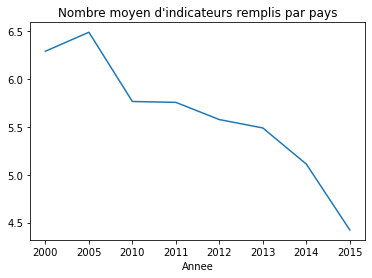

In [261]:
IndicRemp.iloc[:-1,-1].plot(title="Nombre moyen d'indicateurs remplis par pays")
#plt.ylabel("Indicateurs remplis")


##### Sous forme de boxplot

Text(0.5, 1.0, "Evolution de la distribution du nombre d'indicateurs remplis par pays")

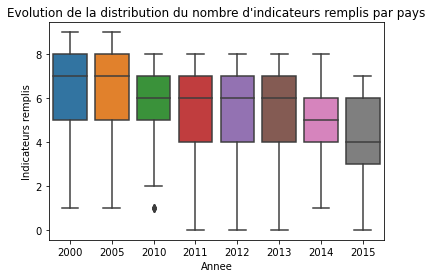

In [262]:
IndicRempMelt = IndicRemp.iloc[:-1,:-1].T.melt()
#sns.boxplot(IndicRempMelt)
sns.boxplot(x='Annee', y='value' ,data=IndicRempMelt)
plt.ylabel('Indicateurs remplis')
plt.title("Evolution de la distribution du nombre d'indicateurs remplis par pays")

In [263]:
DataDis2=DataDis2.droplevel([0], axis=1)
NomCol=DataDis2.columns.tolist()
print(NomCol)

['IT.CMP.PCMP.P2', 'IT.NET.USER.P2', 'NY.GDP.PCAP.CD', 'SE.ENRR', 'SE.SEC.ENRL.TC.ZS', 'SE.XPD.TOTL.GB.ZS', 'SP.POP.TOTL', 'SP.TOTL.IN', 'UIS.DR.2.GPV.T']


### Création d'un dataframe avec pour chaque indicateur le nom et le sens de tri (pour utiliser dans les boucles)

In [264]:
DataDict={'Indic':NomCol} 
DFDataDict = pd.DataFrame(DataDict) # création du dataframe

# pour le nom de l'indicateur
DFDataDict = DFDataDict.merge(Series[['Series Code','Indicator Name']], left_on=['Indic'], right_on=['Series Code'], how='left')
DFDataDict.drop(['Series Code'],axis=1, inplace=True)

# petite manip pour attibuer un nom aux indicateurs créés
DFDataDict['Temp']=np.nan
DFDataDict['Temp']=DFDataDict['Indic'].map(DictNouveauxIndics)
DFDataDict.loc[:,'Indicator Name']= DFDataDict['Indicator Name'].fillna(DFDataDict['Temp'])
DFDataDict.drop('Temp', axis=1, inplace=True)
DFDataDict.set_index('Indic', inplace=True)

DFDataDict['Sens']=[True,True,True,True,True,False,True,True,True] # colonne avec le sens de tri par indicateur, qui sera utilisé pour le rang

DFDataDict

,Indicator Name,Sens
Indic,,
IT.CMP.PCMP.P2,Personal computers (per 100 people),True
IT.NET.USER.P2,Internet users (per 100 people),True
NY.GDP.PCAP.CD,GDP per capita (current US$),True
SE.ENRR,"Gross Enrolment ratio, secondary and tertiary %",True
SE.SEC.ENRL.TC.ZS,Pupil-teacher ratio in secondary education (he...,True
SE.XPD.TOTL.GB.ZS,Expenditure on education as % of total governm...,False
SP.POP.TOTL,"Population, total",True
SP.TOTL.IN,Population en âge d'être dans le secondaire ou...,True
UIS.DR.2.GPV.T,Cumulative drop-out rate to the last grade of ...,True


In [265]:
DataDisR=pd.pivot_table(DataFinalMoy, columns='Region', values='value', index=['Indicator Code','Country Code','Annee'])
DataDisR= DataDisR.reset_index()
DataDisR=DataDisR.drop(['Country Code'], axis=1)
DataDisR

Region,Indicator Code,Annee,America,Europe,Mid E & N Afr & Ce. Asia,S-E Asia & Ocea,Sub-Sah Africa
0,IT.CMP.PCMP.P2,moyenne,7.923544,NaN,NaN,NaN,NaN
1,IT.CMP.PCMP.P2,moyenne,NaN,NaN,0.341903,NaN,NaN
2,IT.CMP.PCMP.P2,moyenne,NaN,NaN,NaN,NaN,0.336119
3,IT.CMP.PCMP.P2,moyenne,NaN,1.222992,NaN,NaN,NaN
4,IT.CMP.PCMP.P2,moyenne,NaN,NaN,19.262625,NaN,NaN
...,...,...,...,...,...,...,...
1682,UIS.DR.2.GPV.T,moyenne,NaN,NaN,NaN,20.33116,NaN
1683,UIS.DR.2.GPV.T,moyenne,NaN,NaN,NaN,2.65361,NaN
1684,UIS.DR.2.GPV.T,moyenne,NaN,NaN,14.623690,NaN,NaN
1685,UIS.DR.2.GPV.T,moyenne,NaN,NaN,NaN,NaN,10.928485


### Distribution des valeurs de chaque indicateur par Region

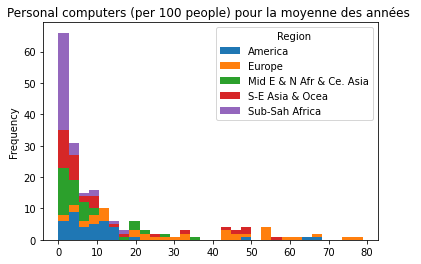

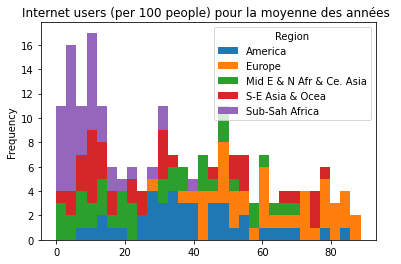

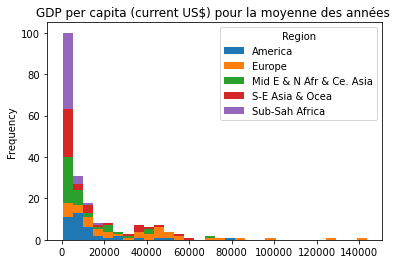

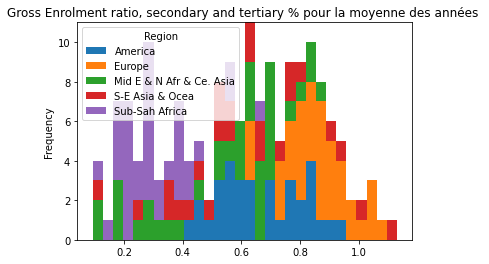

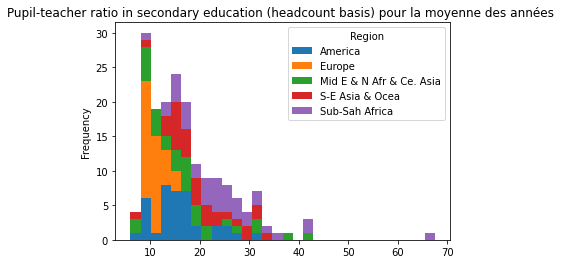

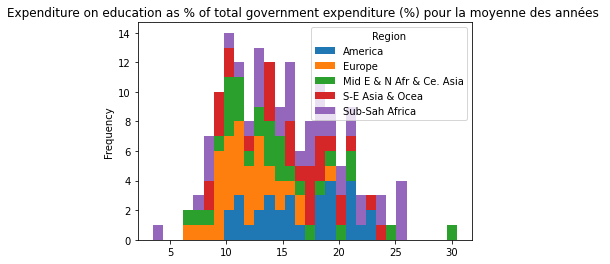

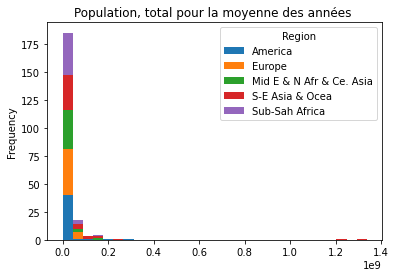

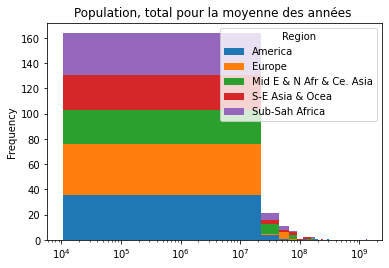

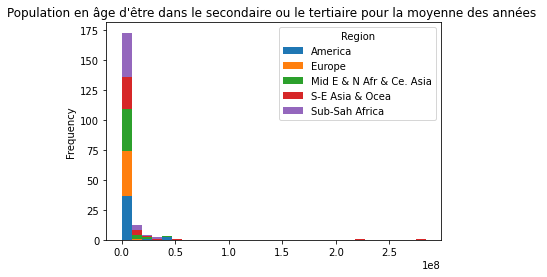

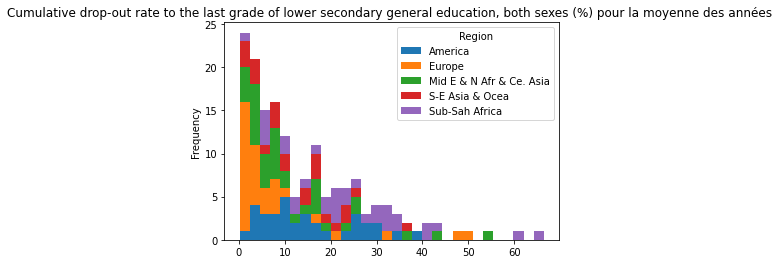

In [266]:
for i in DFDataDict.index :
    DataDisR2=DataDisR.copy()
    
    DataDisR2=DataDisR2.loc[(DataDisR2['Indicator Code']==i)]
    titre= "{} pour la moyenne des années ".format(DFDataDict.loc[i,'Indicator Name'])
    if i!='SP.POP.TOTL'  : # ajout d'un graph avec echelle log pour la population, car 2 importants outliers
        DataDisR2.iloc[:,-5:].plot(figsize=[6,4], kind='hist', stacked=True, bins=30, title=titre)
    else:
        DataDisR2.iloc[:,-5:].plot(figsize=[6,4], kind='hist', stacked=True, bins=30, title=titre )
        DataDisR2.iloc[:,-5:].plot(figsize=[6,4], kind='hist', stacked=True, logx=True, bins=60,title=titre )


### Fichier remanié pour avoir 1 colonne par income group, en vue de créer le barplot avec stack

In [267]:
DataDisI=pd.pivot_table(DataFinalMoy, columns='Income Group', values='value', index=['Indicator Code','Country Code','Annee'])
DataDisI= DataDisI.reset_index()
DataDisI=DataDisI.drop(['Country Code'], axis=1)
DataDisI.head(1)

Income Group,Indicator Code,Annee,Hi inc OCDE,Hi inc nOCDE,Lo inc,Lo mid inc,Up mid inc
0,IT.CMP.PCMP.P2,moyenne,NaN,7.923544,NaN,NaN,NaN


### Distribution des valeurs de chaque indicateur par Region

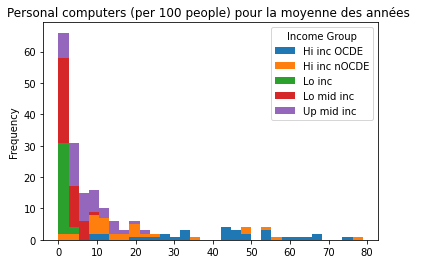

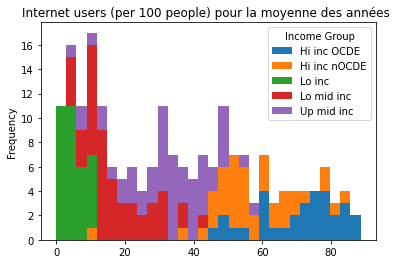

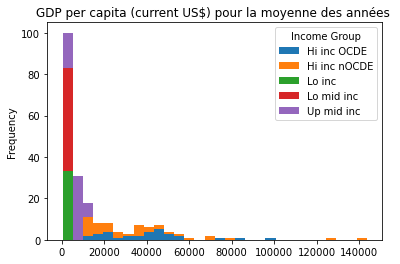

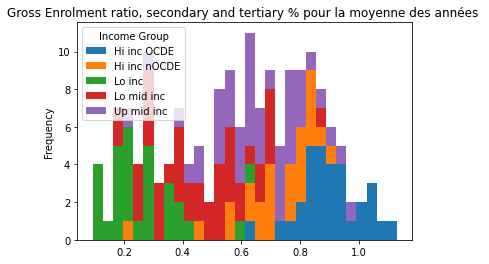

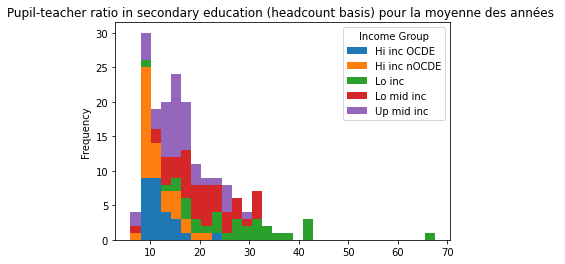

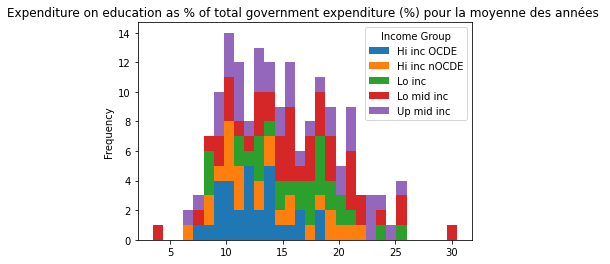

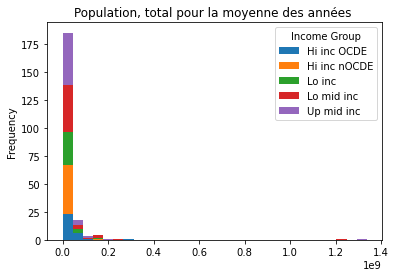

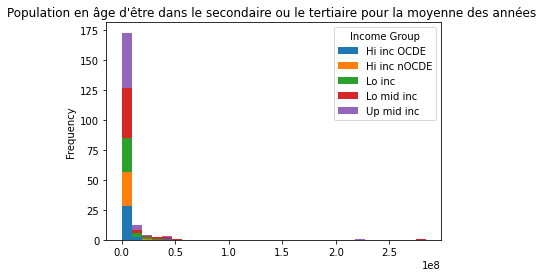

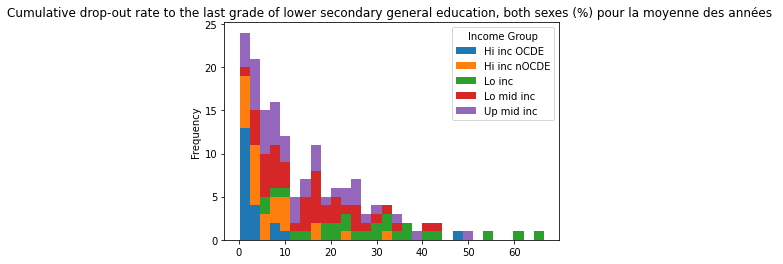

In [268]:
#Distribution des valeurs de chaque indicateur par Income Group
for i in DFDataDict.index :
    DataDisI2=DataDisI.copy()
    DataDisI2=DataDisI2.loc[(DataDisI2['Indicator Code']==i) ]
    titre= "{} pour la moyenne des années ".format(DFDataDict.loc[i,'Indicator Name'])
    DataDisI2.iloc[:,-5:].plot(figsize=[6,4], kind='hist', stacked=True, bins=30, title=titre)

#### création d'une colonne pour indiquer si la ligne est remplie ou non

In [269]:
DataFinalMoy['rempli']=np.nan
DataFinalMoy['rempli']= DataFinalMoy['value'].apply(lambda x : 0 if np.isnan(x) else 1)
DataFinalMoy.head(1)

,Country Code,Annee,Indicator Code,value,Country Name,Region,Income Group,Indicator Name,CategorieIndicateur,rempli
0,ABW,moyenne,IT.CMP.PCMP.P2,7.923544,Aruba,America,Hi inc nOCDE,Personal computers (per 100 people),Inf,1


### Remplissage des indicateurs sélectionnés

#### Boxplot au niveau global

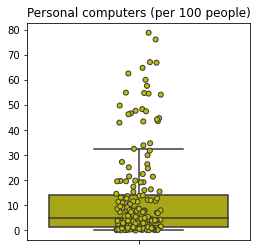

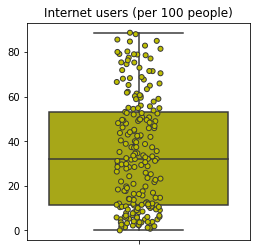

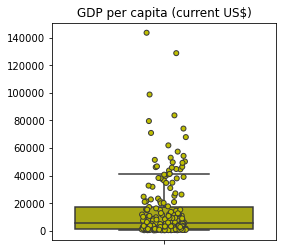

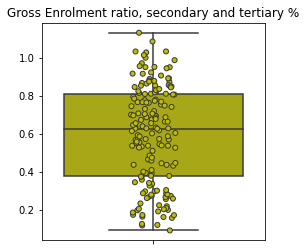

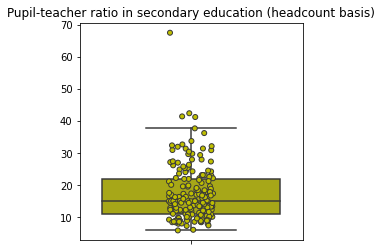

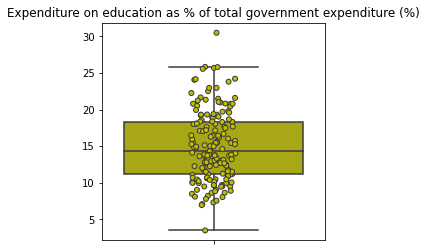

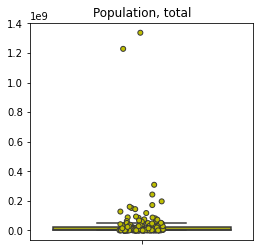

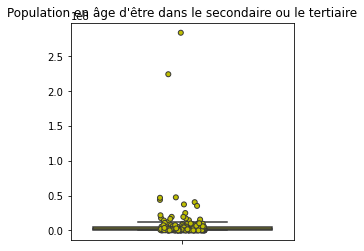

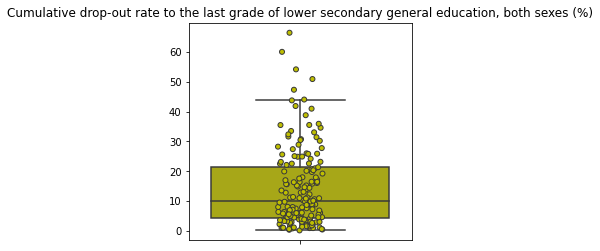

In [270]:
DataDis1 = pd.pivot_table(DataFinalMoy, columns='Indicator Code', index=['Country Code','Annee'], values='value').reset_index()
for i in DataDis1.columns[2:] :
    #cond = DataDis1.loc[DataDis1['Annee']==DFDataDict.loc[i,'Annee']]
    plt.figure(figsize=[4,4])
    sns.boxplot(DataDis1[i], orient='v', fliersize=0, color='y')
    sns.stripplot(DataDis1[i], orient='v', linewidth=1, color='y')
    plt.title(DFDataDict.loc[i,'Indicator Name'])
    plt.ylabel('') 


In [271]:
DataDis1.head(1)

Indicator Code,Country Code,Annee,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.ENRR,SE.SEC.ENRL.TC.ZS,SE.XPD.TOTL.GB.ZS,SP.POP.TOTL,SP.TOTL.IN,UIS.DR.2.GPV.T
0,ABW,moyenne,7.923544,62.148006,23380.048349,0.695036,14.459508,20.961997,101063.25,14130.75,4.88931


#### Distribution des indicateurs par Region/Income Group

Pour l'année de référence :

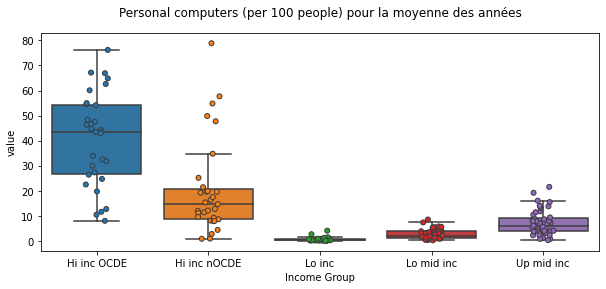

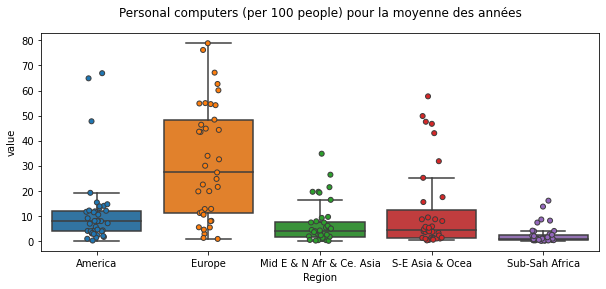

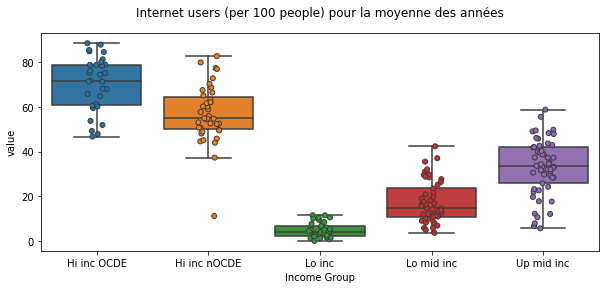

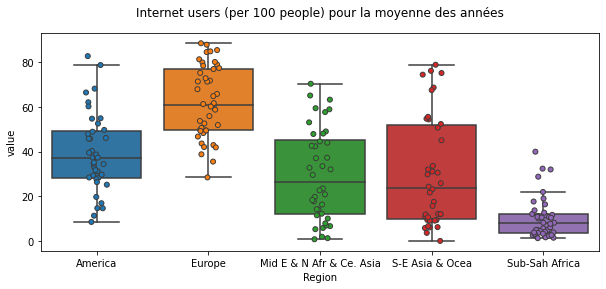

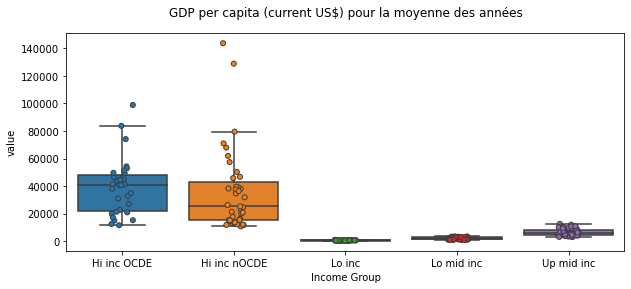

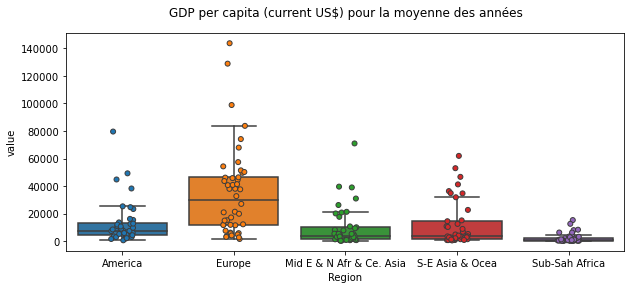

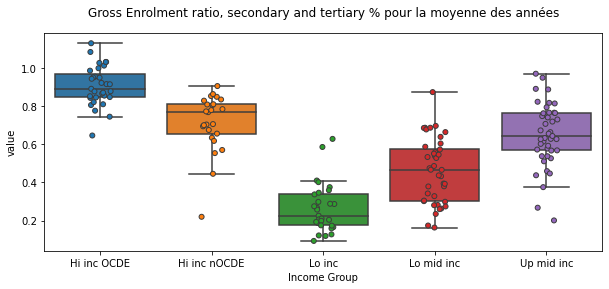

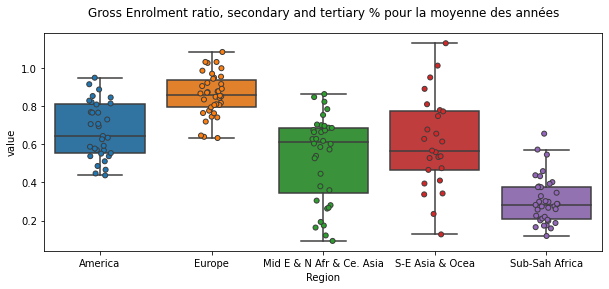

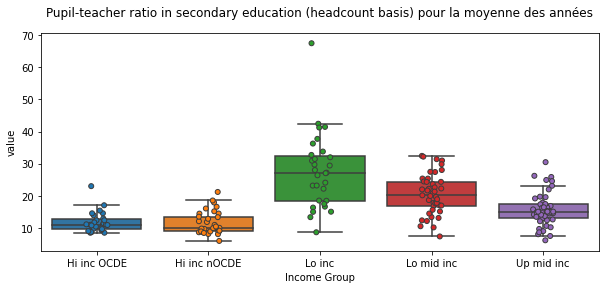

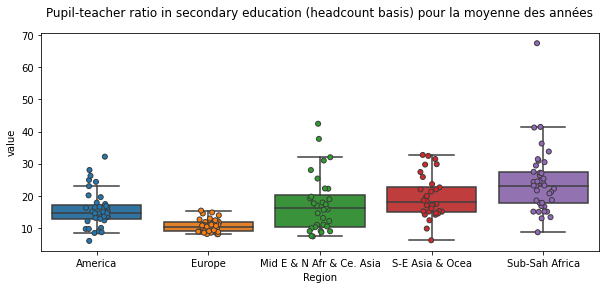

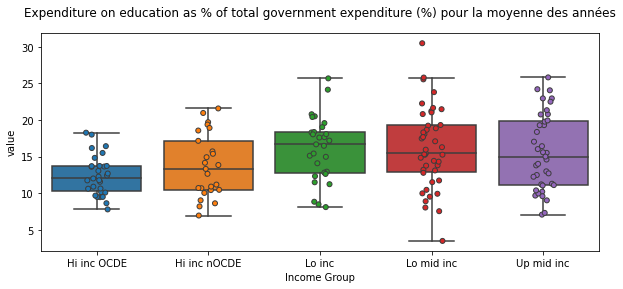

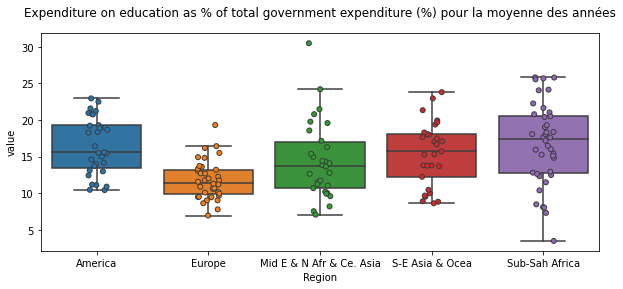

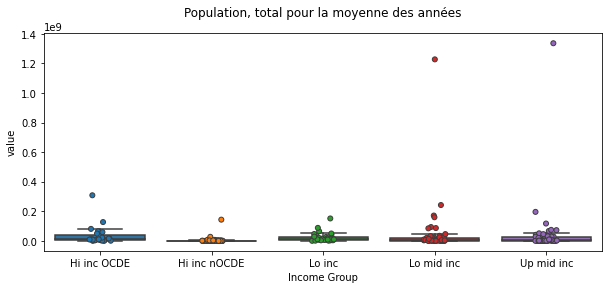

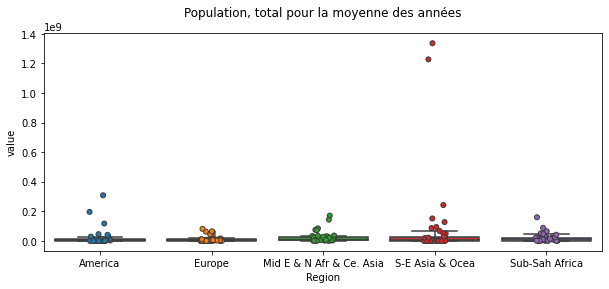

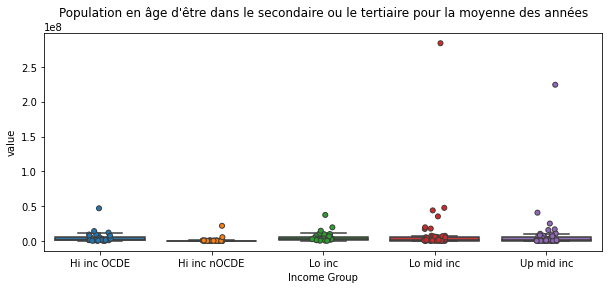

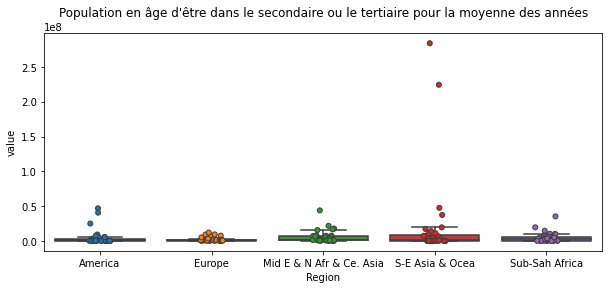

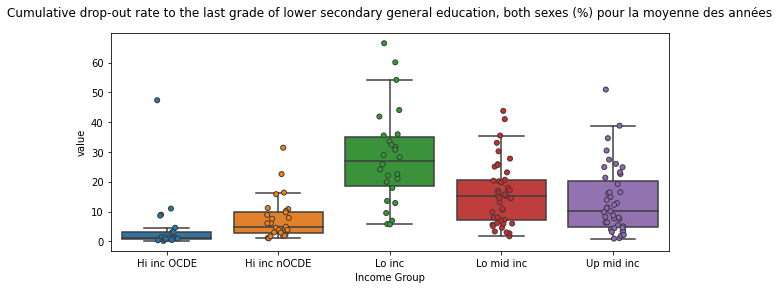

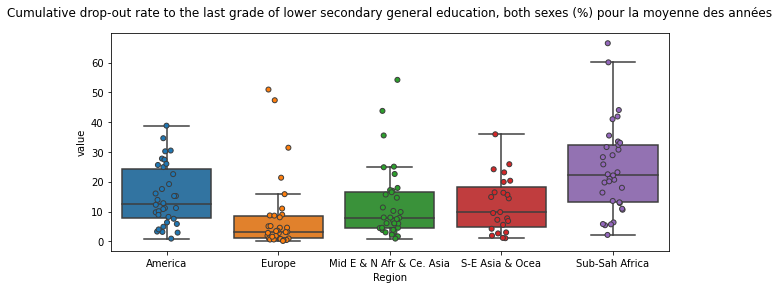

In [272]:
for i in DFDataDict.index:
    
    # Par income group
    DataDisB=DataFinalMoy.loc[(DataFinalMoy['Indicator Code']==i) ]
    titre= "{} pour la moyenne des années".format(DFDataDict.loc[i,'Indicator Name'])
    plt.figure(figsize=[10,4])
    plt.title(titre, y=1.05) 
    sns.boxplot(x='Income Group',y='value',fliersize=0,data=DataFinalMoy[DataFinalMoy['Indicator Code']==i].sort_values('Income Group'))
    sns.stripplot(x='Income Group', y='value', linewidth=1,data=DataFinalMoy[DataFinalMoy['Indicator Code']==i].sort_values('Income Group'))

    # Par région
    plt.figure(figsize=[10,4])
    plt.title(titre, y=1.05)
    sns.boxplot(x='Region',y='value',fliersize=0,data=DataFinalMoy[DataFinalMoy['Indicator Code']==i].sort_values('Region'))
    sns.stripplot(x='Region', y='value', linewidth=1,data=DataFinalMoy[DataFinalMoy['Indicator Code']==i].sort_values('Region'))


Avec l'évolution au fil du temps

<ipython-input-273-201907c7b160>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,4))
<ipython-input-273-201907c7b160>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,4))
<ipython-input-273-201907c7b160>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,

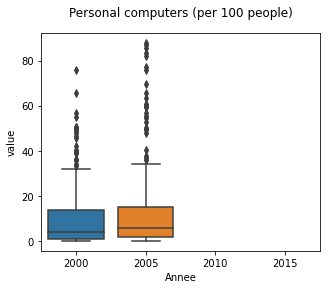

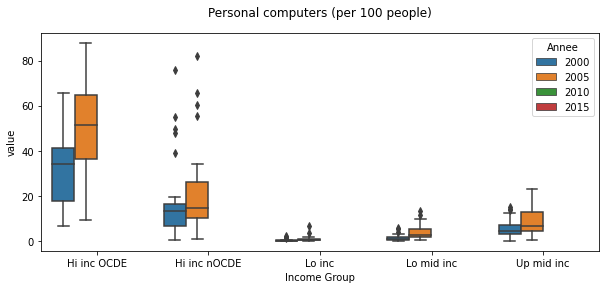

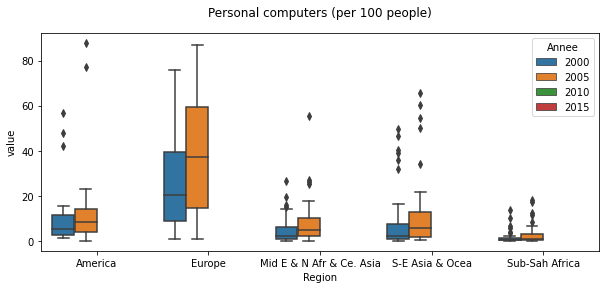

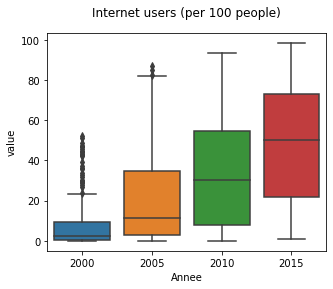

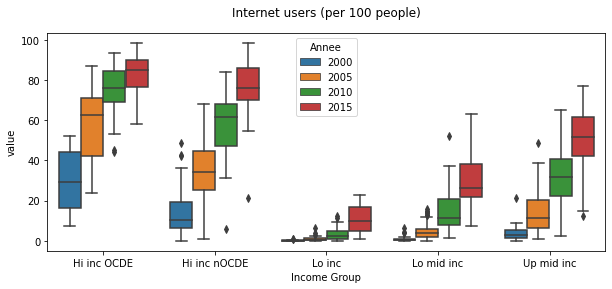

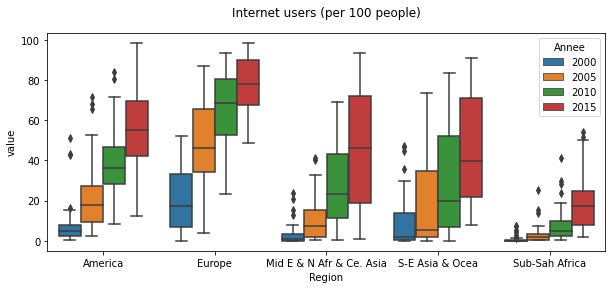

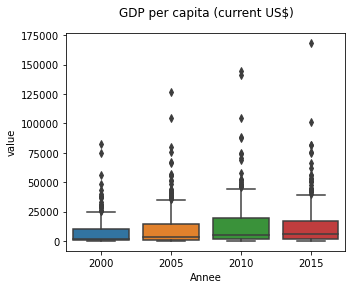

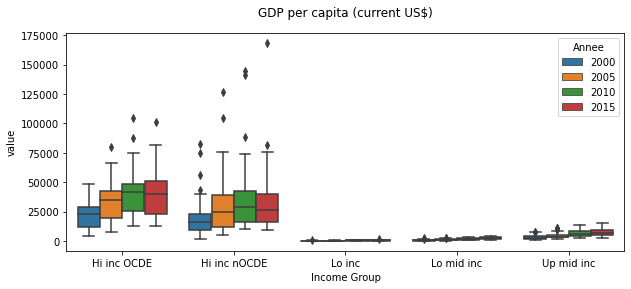

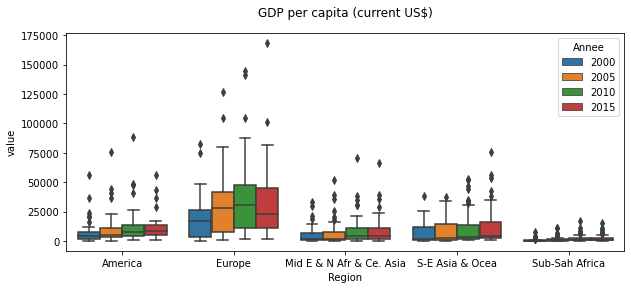

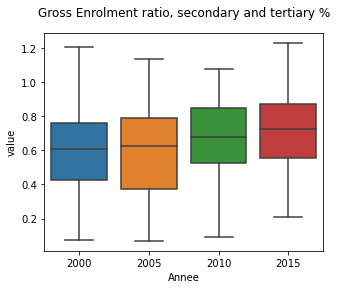

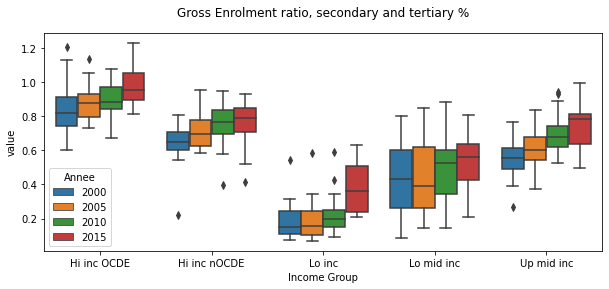

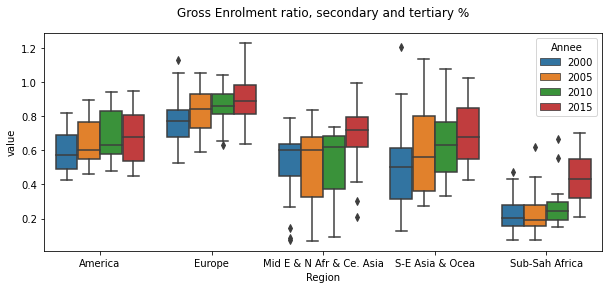

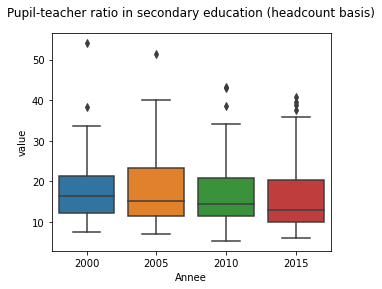

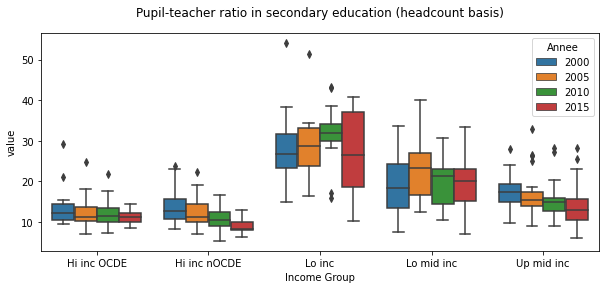

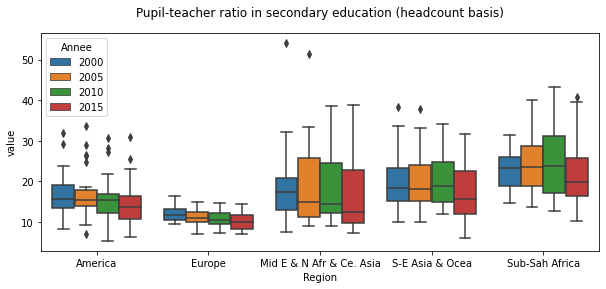

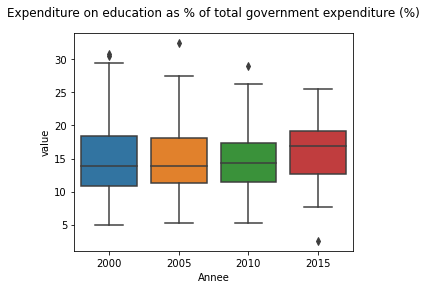

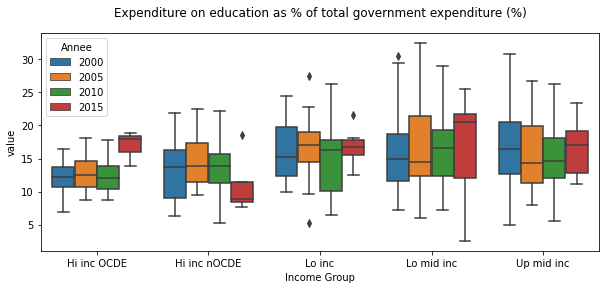

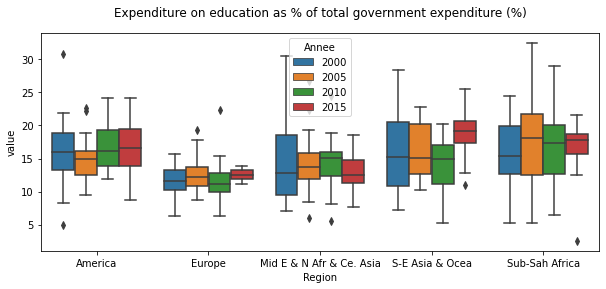

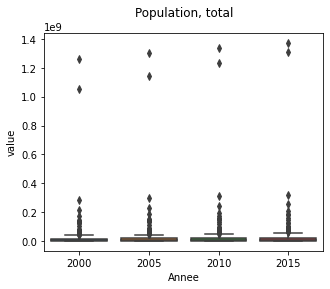

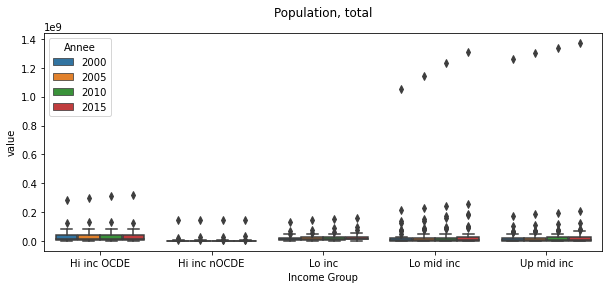

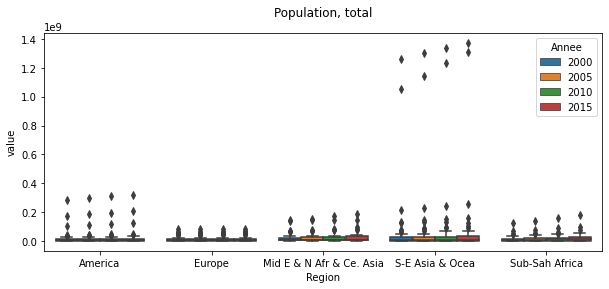

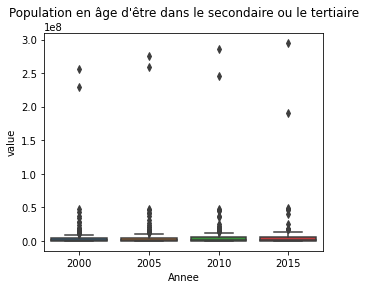

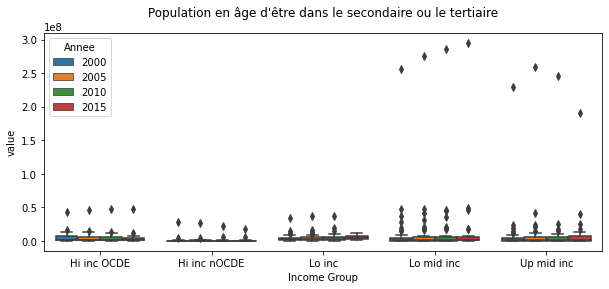

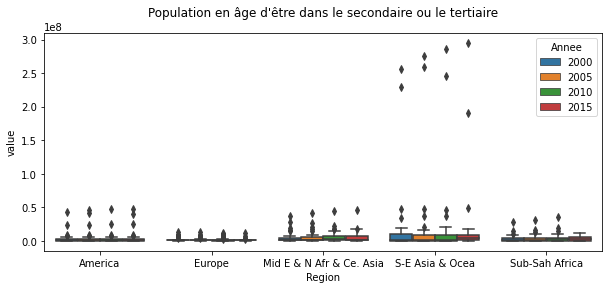

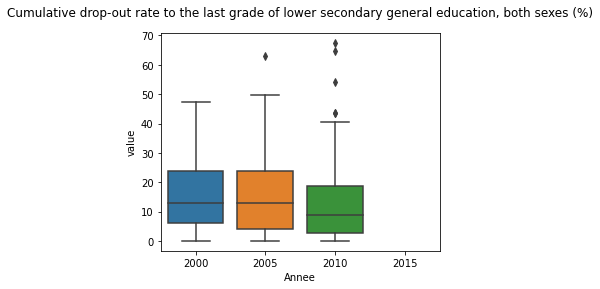

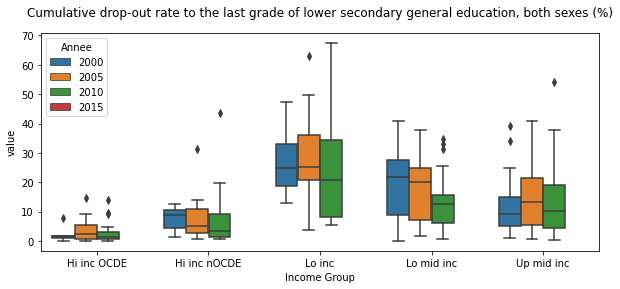

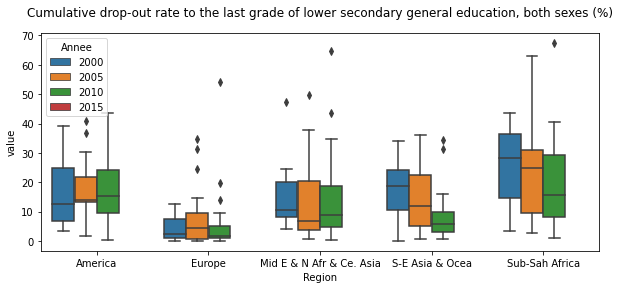

In [273]:
#Evolution de la distribution des indicateurs au fil du temps 
DataDisC=DataDis.loc[np.isin(DataDis['Annee'], ['2000','2005','2010','2015'])]


for i in DFDataDict.index:
    DataDisD=DataDisC.loc[(DataDis['Indicator Code']==i)]
    titre= DFDataDict.loc[i,'Indicator Name']
    
    #Année
    plt.figure(figsize=(5,4))
    plt.title(titre, y=1.05)    
    sns.boxplot(x='Annee', y='value', data=DataDisD)
    
    #Income Group
    plt.figure(figsize=(10,4))
    plt.title(titre, y=1.05)    
    sns.boxplot(x='Income Group', y='value',hue='Annee', data=DataDisD.sort_values('Income Group'))
    
    #Region

    plt.figure(figsize=(10,4))
    plt.title(titre, y=1.05)    
    sns.boxplot(x='Region', y='value',hue='Annee', data=DataDisD.sort_values('Region'))
    

### Classement des 10 meilleurs pays par indicateur

In [274]:
for i in DFDataDict.index:
    DataFinalMoy2= DataFinalMoy.loc[(DataFinalMoy['Indicator Code']==i)].sort_values('value', ascending = False)
    print("Indicateur ", i, " : \n")
    print (DataFinalMoy2[['Country Name','value']].head(10), "\n")

Indicateur  IT.CMP.PCMP.P2  : 

        Country Name      value
1367      San Marino  78.871080
268      Switzerland  76.191132
1428          Sweden  67.153139
1590   United States  66.922092
261           Canada  64.875546
1134     Netherlands  62.625514
425          Denmark  60.100902
1338       Singapore  57.690636
542   United Kingdom  54.989521
568        Gibraltar  54.842602 

Indicateur  IT.NET.USER.P2  : 

       Country Name      value
731         Iceland  88.599603
1143         Norway  87.960458
1429         Sweden  85.547678
426         Denmark  84.956582
1135    Netherlands  84.666443
190         Bermuda  82.833230
922      Luxembourg  81.408464
502         Finland  80.209423
887   Liechtenstein  79.993185
269     Switzerland  79.089010 

Indicateur  NY.GDP.PCAP.CD  : 

          Country Name          value
888      Liechtenstein  143668.078096
958             Monaco  128861.679611
923         Luxembourg   98849.852317
1144            Norway   83731.563666
191            Be

## Corrélation entre les indicateurs

### Coefficients de corrélation

#### En valeur

In [275]:
# Des noms courts sont attribués à chaque indicateur pour qu'ils ne prennent pas trop de place sur les graphs et soient explicites

mapping_colonnes = {'IT.CMP.PCMP.P2':'Computers','IT.NET.USER.P2':'Internet','NY.GDP.PCAP.CD':'GDP',
'PRJ.POP.1519.2.MF': 'Proj 15-19','PRJ.POP.2024.3.MF':'Proj 20-24','SE.SEC.ENRL.TC.ZS':'Pup-tea rat','SE.XPD.TOTL.GB.ZS':'Exp on edu',
'SP.POP.TOTL' :	'Population', 'UIS.DR.2.GPV.T':'Drop-out rate', 'SE.ENRR':'Enrol sec/ter', 
'Perc Pop Ter':'% age ter', 'Perc Pop Sec':'% age sec', 'SP.TOTL.IN':'Pop off age sec/ter'}


DataFinalMoy3=DataFinalMoy.copy()
DataFinalMoy3['Nouv Indicator Code']=DataFinalMoy3['Indicator Code'].map(mapping_colonnes)
                                               
DataPP = pd.pivot_table(DataFinalMoy3, columns='Nouv Indicator Code', index='Country Name', values='value')


#DataPP.columns=DataPP.columns.map(mapping_colonnes)
DataC=DataPP.corr()
DataC

Nouv Indicator Code,Computers,Drop-out rate,Enrol sec/ter,Exp on edu,GDP,Internet,Pop off age sec/ter,Population,Pup-tea rat
Nouv Indicator Code,,,,,,,,,
Computers,1.000000,-0.380887,0.622926,-0.228456,0.851066,0.804676,-0.069014,-0.043238,-0.411305
Drop-out rate,-0.380887,1.000000,-0.571105,0.293818,-0.261523,-0.486012,-0.051978,-0.054270,0.584132
Enrol sec/ter,0.622926,-0.571105,1.000000,-0.334866,0.513230,0.829072,-0.055949,-0.023109,-0.660282
Exp on edu,-0.228456,0.293818,-0.334866,1.000000,-0.256326,-0.323854,-0.007616,-0.022223,0.245431
GDP,0.851066,-0.261523,0.513230,-0.256326,1.000000,0.755322,-0.074203,-0.064424,-0.414173
Internet,0.804676,-0.486012,0.829072,-0.323854,0.755322,1.000000,-0.076233,-0.054997,-0.640660
Pop off age sec/ter,-0.069014,-0.051978,-0.055949,-0.007616,-0.074203,-0.076233,1.000000,0.985474,0.114936
Population,-0.043238,-0.054270,-0.023109,-0.022223,-0.064424,-0.054997,0.985474,1.000000,0.090095
Pup-tea rat,-0.411305,0.584132,-0.660282,0.245431,-0.414173,-0.640660,0.114936,0.090095,1.000000


#### En format Heatmap

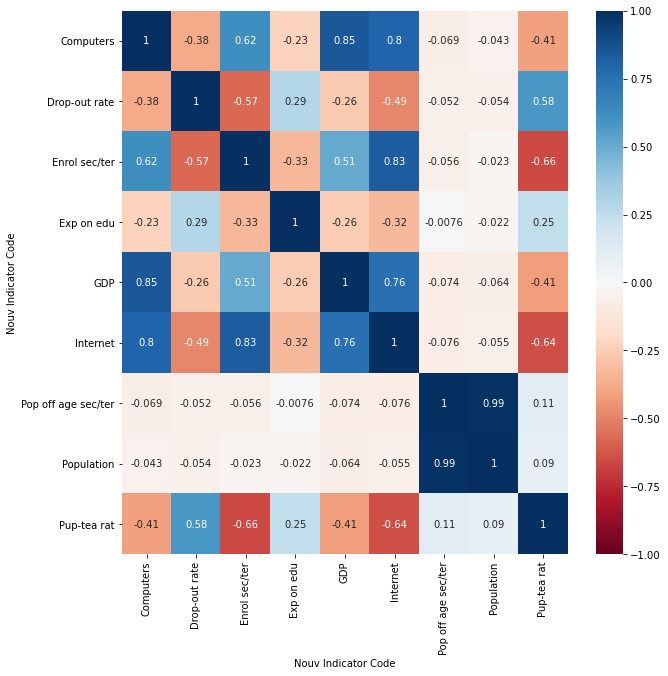

In [276]:
plt.figure(figsize=[10,10])
sns.heatmap(DataC, center=0, vmin=-1, vmax=1,annot=True, cmap='RdBu')

#### En format Heatmap individuel avec tri

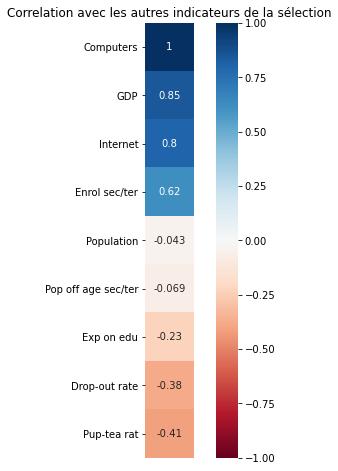

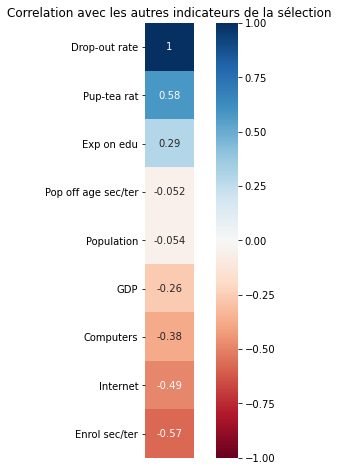

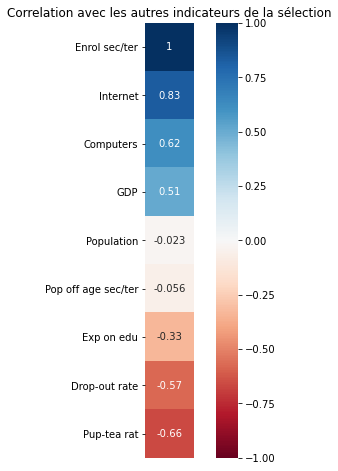

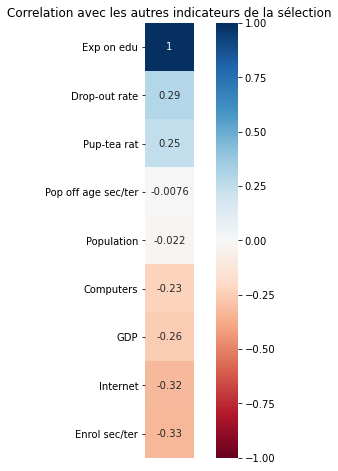

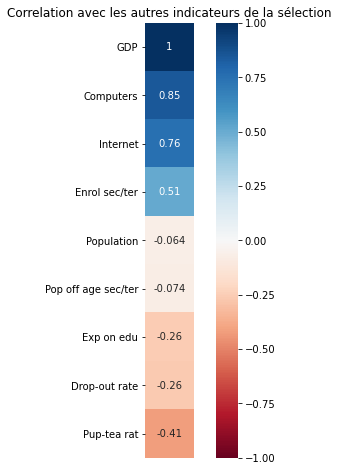

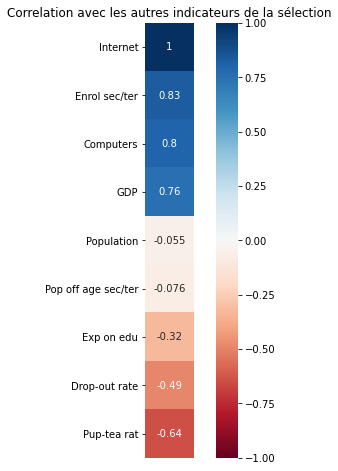

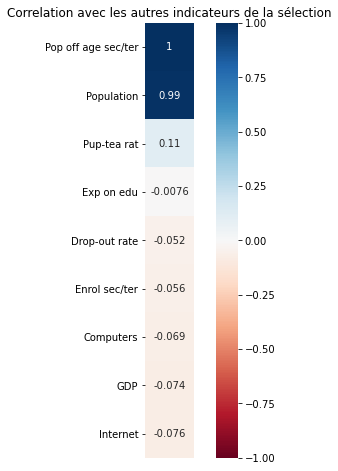

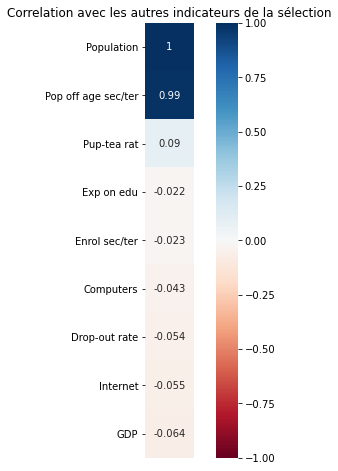

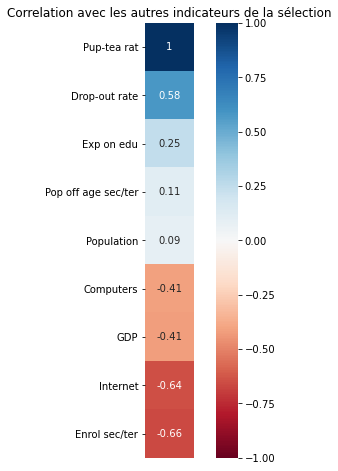

In [277]:
for i in DataC.index:
    plt.figure(figsize=[8,8])
    sns.heatmap(DataC[[i]].sort_values(i, ascending=False), square=True, annot=True, vmin=-1, vmax=1, center=0, xticklabels=False, cmap='RdBu')
    plt.title('Correlation avec les autres indicateurs de la sélection', y=1.1)
    plt.xlabel('')
    plt.ylabel('')

#### En format Pairplot Seaborn

Text(0.5, 0.98, '')

<Figure size 432x288 with 0 Axes>

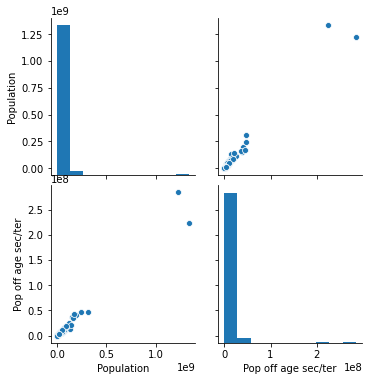

<Figure size 432x288 with 0 Axes>

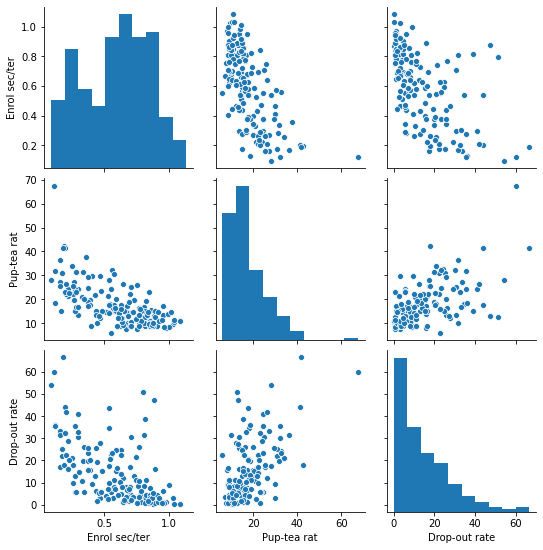

<Figure size 432x288 with 0 Axes>

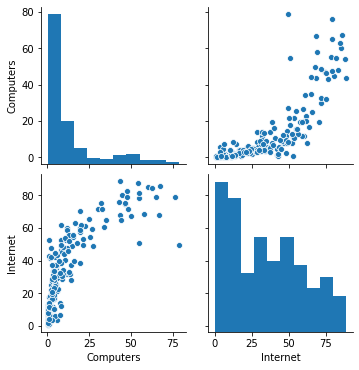

<Figure size 432x288 with 0 Axes>

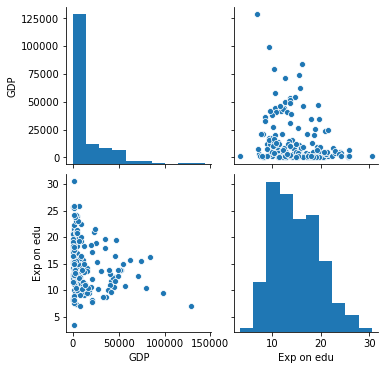

<Figure size 432x288 with 0 Axes>

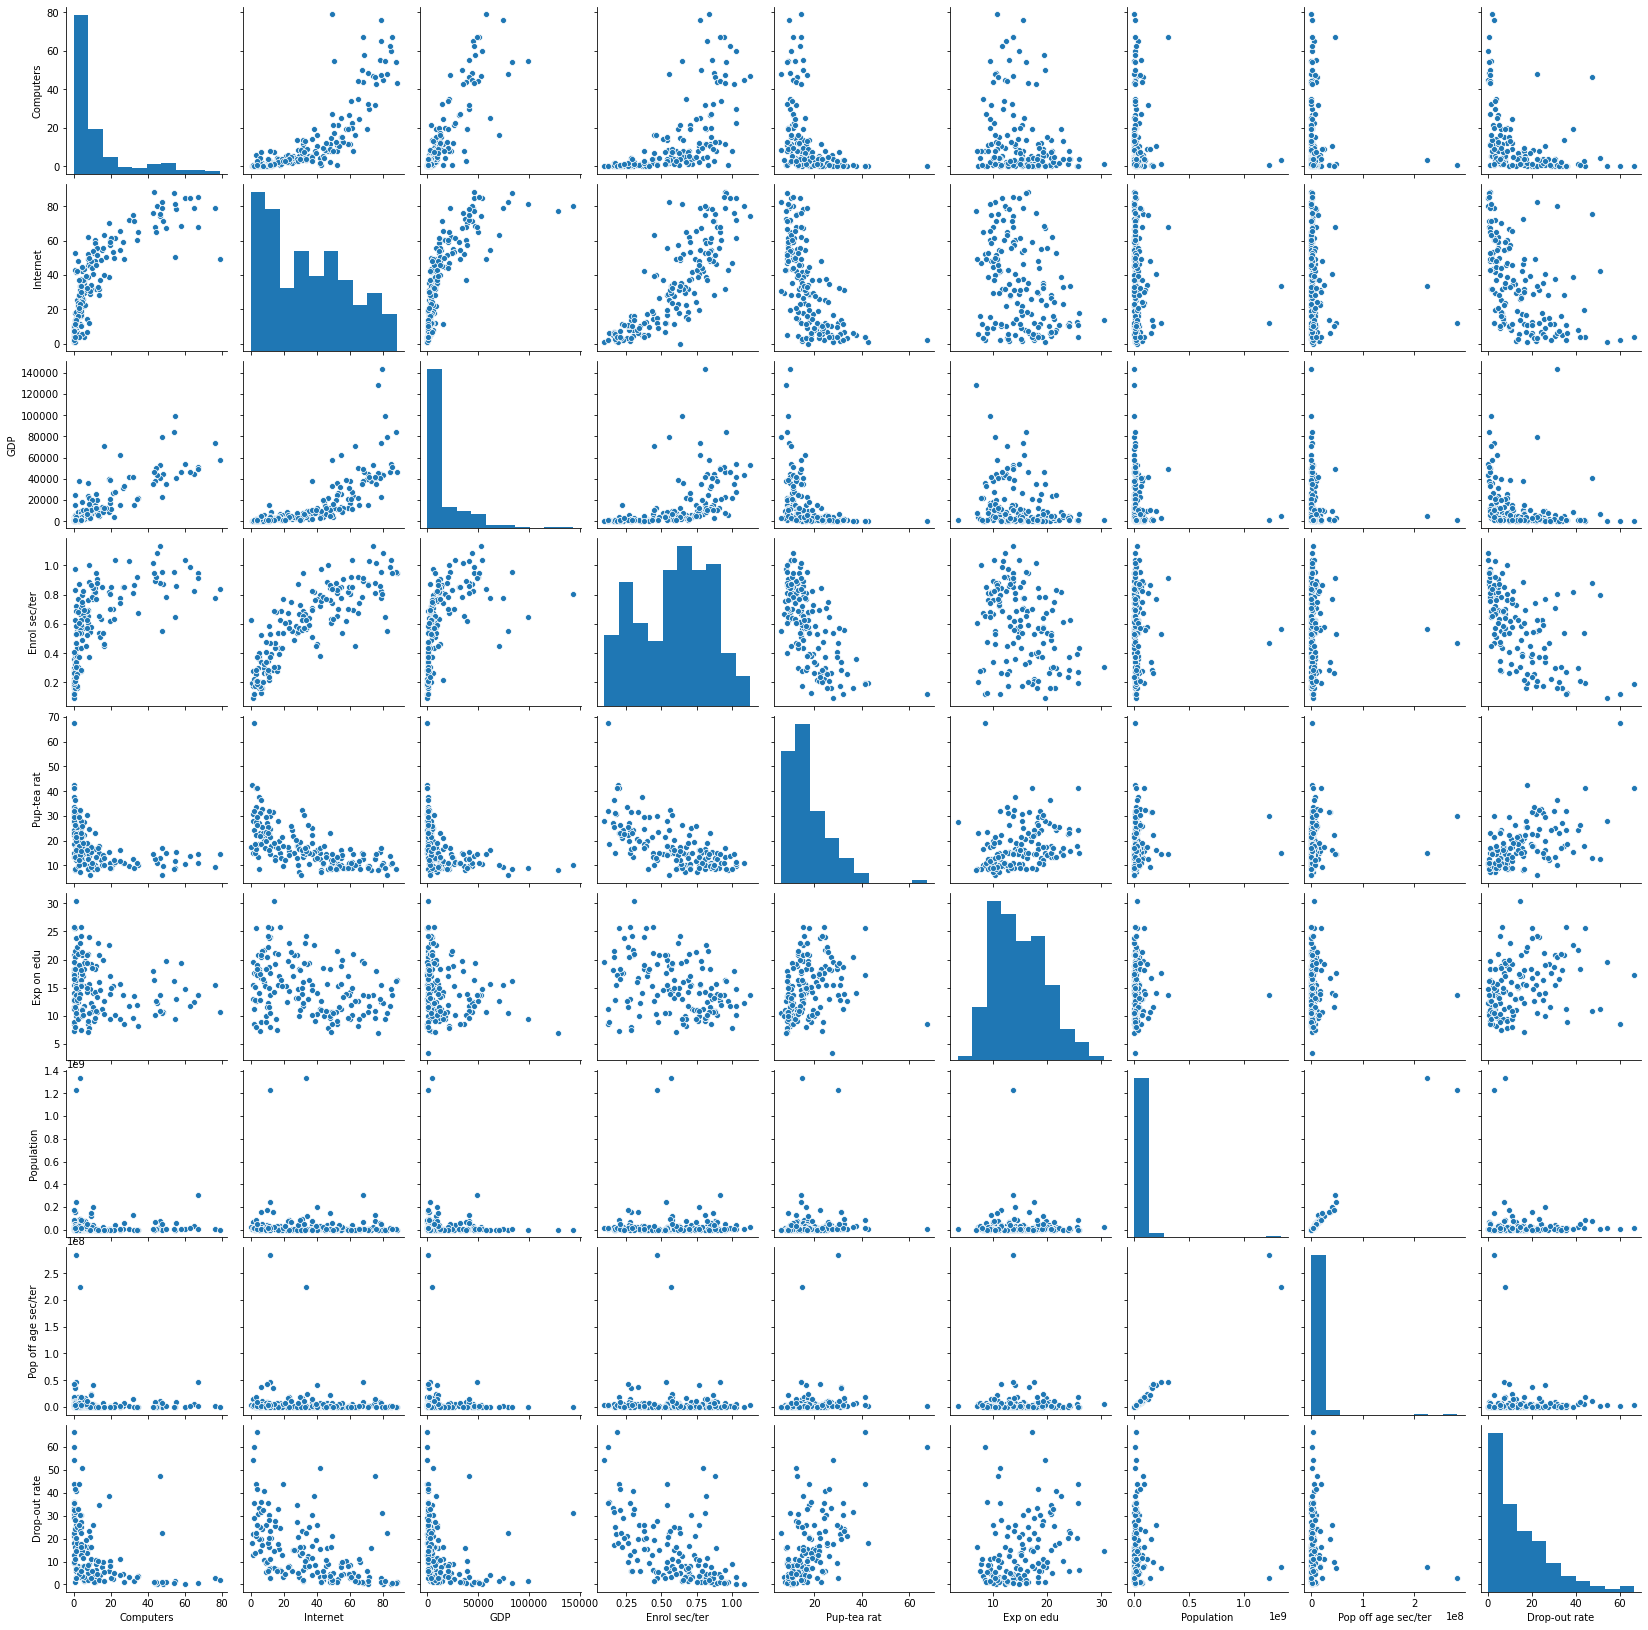

In [278]:
DataPT = pd.pivot_table(DataFinalMoy3,columns=['Indicator Code'], index='Country Code', values='value')
DataPT.columns
#1 graph par catégorie
for i in [Dem, Edu, Inf, Eco] :
    DataPT2=DataPT.loc[:,np.isin(DataPT.columns,i)]
    DataPT2.columns=DataPT2.columns.map(mapping_colonnes)
    plt.figure()
    g= sns.pairplot(DataPT2)
    g.fig.suptitle('')

# puis un graph global

plt.figure()
DataPT3=DataPT.copy()
DataPT3.columns=DataPT3.columns.map(mapping_colonnes)
h=sns.pairplot(DataPT3)
h.fig.suptitle('')


## Classement final

### Seuls les pays avec l'ensemble des indicateurs remplis sont éligibles au classement final

In [279]:
FiltrePays=DataFinalMoy.groupby('Country Code')['rempli'].count()
FiltrePays=FiltrePays[FiltrePays==9].index
len(FiltrePays)

115

In [280]:
DataRang=DataFinalMoy.copy()
DataRang=DataRang[np.isin(DataRang['Country Code'],FiltrePays)]
DataRang.head(1)

,Country Code,Annee,Indicator Code,value,Country Name,Region,Income Group,Indicator Name,CategorieIndicateur,rempli
0,ABW,moyenne,IT.CMP.PCMP.P2,7.923544,Aruba,America,Hi inc nOCDE,Personal computers (per 100 people),Inf,1


### Création d'une colonne 'rang' qui donne le classement des pays en fonction de chaque indicateur

In [281]:
DataRang.loc[:,'Rang']=np.nan
for i in DataRang['Indicator Code'].unique() :
    DataRang.loc[DataRang['Indicator Code']==i,'Rang']=DataRang.loc[DataRang['Indicator Code']==i,'value'].\
    rank(pct=True, na_option='top', ascending=DFDataDict.loc[i,'Sens'])
DataRang

,Country Code,Annee,Indicator Code,value,Country Name,Region,Income Group,Indicator Name,CategorieIndicateur,rempli,Rang
0,ABW,moyenne,IT.CMP.PCMP.P2,7.923544e+00,Aruba,America,Hi inc nOCDE,Personal computers (per 100 people),Inf,1,0.582609
1,ABW,moyenne,IT.NET.USER.P2,6.214801e+01,Aruba,America,Hi inc nOCDE,Internet users (per 100 people),Inf,1,0.860870
2,ABW,moyenne,NY.GDP.PCAP.CD,2.338005e+04,Aruba,America,Hi inc nOCDE,GDP per capita (current US$),Eco,1,0.826087
3,ABW,moyenne,SE.ENRR,6.950359e-01,Aruba,America,Hi inc nOCDE,"Gross Enrolment ratio, secondary and tertiary %",Edu,1,0.634783
4,ABW,moyenne,SE.SEC.ENRL.TC.ZS,1.445951e+01,Aruba,America,Hi inc nOCDE,Pupil-teacher ratio in secondary education (he...,Edu,1,0.408696
...,...,...,...,...,...,...,...,...,...,...,...
1682,ZWE,moyenne,SE.SEC.ENRL.TC.ZS,2.320863e+01,Zimbabwe,Sub-Sah Africa,Lo inc,Pupil-teacher ratio in secondary education (he...,Edu,1,0.782609
1683,ZWE,moyenne,SE.XPD.TOTL.GB.ZS,2.414702e+01,Zimbabwe,Sub-Sah Africa,Lo inc,Expenditure on education as % of total governm...,Eco,1,0.052174
1684,ZWE,moyenne,SP.POP.TOTL,1.432371e+07,Zimbabwe,Sub-Sah Africa,Lo inc,"Population, total",Dem,1,0.660870
1685,ZWE,moyenne,SP.TOTL.IN,3.586188e+06,Zimbabwe,Sub-Sah Africa,Lo inc,Population en âge d'être dans le secondaire ou...,Dem,1,0.730435


### Création des 5 critères

In [282]:
DataRangFinal=pd.pivot_table(DataRang, columns=['Indicator Code'], index='Country Name', values='Rang')
DataRangFinal['Techno']=DataRangFinal[['IT.CMP.PCMP.P2','IT.NET.USER.P2']].mean(axis=1)
DataRangFinal['Difficultés Edu']=DataRangFinal[['SE.SEC.ENRL.TC.ZS','SE.XPD.TOTL.GB.ZS','UIS.DR.2.GPV.T']].mean(axis=1)
DataRangFinal['Richesse']=DataRangFinal['NY.GDP.PCAP.CD']
DataRangFinal['Population']=DataRangFinal['SP.TOTL.IN']
DataRangFinal["Prop étudiants"]=DataRangFinal['SE.ENRR']
DataRangFinal['Classement Final']=DataRangFinal[['Techno','Difficultés Edu','Richesse','Population',"Prop étudiants"]].mean(axis=1)
DataRangFinal

Indicator Code,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.CD,SE.ENRR,SE.SEC.ENRL.TC.ZS,SE.XPD.TOTL.GB.ZS,SP.POP.TOTL,SP.TOTL.IN,UIS.DR.2.GPV.T,Techno,Difficultés Edu,Richesse,Population,Prop étudiants,Classement Final
Country Name,,,,,,,,,,,,,,,
Albania,0.243478,0.626087,0.469565,0.669565,0.443478,0.756522,0.286957,0.330435,0.252174,0.434783,0.484058,0.469565,0.330435,0.669565,0.477681
Argentina,0.600000,0.669565,0.669565,0.913043,0.391304,0.434783,0.834783,0.843478,0.626087,0.634783,0.484058,0.669565,0.843478,0.913043,0.708986
Aruba,0.582609,0.860870,0.826087,0.634783,0.408696,0.130435,0.043478,0.034783,0.313043,0.721739,0.284058,0.826087,0.034783,0.634783,0.500290
Austria,0.939130,0.913043,0.921739,0.886957,0.156522,0.817391,0.530435,0.460870,0.026087,0.926087,0.333333,0.921739,0.460870,0.886957,0.705797
Bahrain,0.895652,0.878261,0.808696,0.600000,0.165217,0.982609,0.182609,0.173913,0.260870,0.886957,0.469565,0.808696,0.173913,0.600000,0.587826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,0.513043,0.565217,0.652174,0.808696,0.669565,0.852174,0.895652,0.904348,0.556522,0.539130,0.692754,0.652174,0.904348,0.808696,0.719420
Ukraine,0.391304,0.460870,0.365217,0.895652,0.182609,0.643478,0.852174,0.817391,0.321739,0.426087,0.382609,0.365217,0.817391,0.895652,0.577391
Uruguay,0.704348,0.660870,0.730435,0.713043,0.382609,0.782609,0.313043,0.295652,0.530435,0.682609,0.565217,0.730435,0.295652,0.713043,0.597391


#### Classement

In [283]:
(DataRangFinal.iloc[DataRangFinal.index!='France',-6:]*100).sort_values('Classement Final', ascending=False).head(10)#.to_excel('C://Users//hp//Documents//openclassrooms//projet2//tabf.xls')

Indicator Code,Techno,Difficultés Edu,Richesse,Population,Prop étudiants,Classement Final
Country Name,,,,,,
Germany,93.043478,69.855072,89.565217,88.695652,90.434783,86.318841
Italy,78.695652,42.898551,85.217391,85.217391,85.217391,75.449275
Belgium,90.000000,36.231884,90.434783,51.304348,98.260870,73.246377
Sweden,98.695652,31.304348,93.043478,47.826087,94.782609,73.130435
Brazil,63.913043,64.927536,64.347826,97.391304,70.434783,72.202899
Turkey,53.913043,69.275362,65.217391,90.434783,80.869565,71.942029
Argentina,63.478261,48.405797,66.956522,84.347826,91.304348,70.898551
Finland,93.478261,32.753623,91.304348,36.521739,100.000000,70.811594
Denmark,97.826087,25.217391,93.913043,37.391304,99.130435,70.695652
